# Paper: Confocal non-line-of-sight based on the light-cone transform

## Abstract
How to image objects that are hidden from a camera’s view is a problem of fundamental importance to many fields of research1–20, with applications in robotic vision, defence, remote sensing, medical imaging and autonomous vehicles. Non-line-of-sight (NLOS) imaging at macroscopic scales has been demonstrated by scanning a visible surface with a pulsed laser and a time-resolved detector14–19. Whereas light detection and ranging (LIDAR) systems use such measurements to recover the shape of visible objects from direct reflections21–24, NLOS imaging reconstructs the shape and albedo of hidden objects from multiply scattered light. Despite recent advances, NLOS imaging has remained impractical owing to the prohibitive memory and processing requirements of existing reconstruction algorithms, and the extremely weak signal of multiply scattered light. Here we show that a confocal scanning procedure can address these challenges by facilitating the derivation of the light-cone transform to solve the NLOS reconstruction problem. This method requires much smaller computational and memory resources than previous reconstruction methods do and images hidden objects at unprecedented resolution. Confocal scanning also provides a sizeable increase in signal and range when imaging retroreflective objects. We quantify the resolution bounds of NLOS imaging, demonstrate its potential for real-time tracking and derive efficient algorithms that incorporate image priors and a physically accurate noise model. Additionally, we describe successful outdoor experiments of NLOS imaging under indirect sunlight. 

### 摘要中的重点

摘要中的重点包括:

+ 非视距成像，即当照相机与物体之间有障碍物时的成像，有很多应用，包括在机器视觉，遥感，医学成像，自动驾驶等
+ 通过脉冲激光和时间分辨探测器扫描可见表面已经验证了宏观尺度上的非视距成像
+ 尽管NLOS最近取得了不少的进展，但NLOS成像仍旧不切实际，原因包括:
     + 现有重建算法对于存储和处理速度的要求过高
     + 多次散射后光信号极弱
+ 本文说明了共焦扫描可以通过促进光锥变换的实现来解决NLOS的重建问题
+ 这种基于光锥变换的共焦非视距成像的优点有：
     + 时间复杂度低
     + 空间复杂度低
     + 成像分辨率高
     + 当对逆向反射物体进行成像时，共焦扫描还可以显着增加信号和范围
+ 本文的其他工作
     + 量化了NLOS成像的分辨率界限
     + 展示了其实时跟踪的潜力
     + 推导出包含图像先验和物理精确噪声模型的高效算法
     + 描述了在间接阳光下成功进行NLOS成像的户外实验。

## Paragraph 1
LIDAR systems use time-resolved sensors to scan the three- dimensional (3D) geometry of objects21–24. Such systems acquire range measurements by recording the time required for light to travel along a direct path from a source to a point on the object and back to a sensor. Recently, these types of sensors have also been used to perform NLOS tracking12,13 or imaging14–20 of objects ‘hidden around corners’, where the position and shape of the objects are computed from indirect light paths. The light travelling along indirect paths scatters multiple times before reaching a sensor and may scatter off objects outside a camera’s direct line of sight (Fig. 1). Recovering images of hidden objects from indirect light paths involves a challenging inverse problem because there are infinitely many such paths to consider. With applications in remote sensing and machine vision, NLOS imaging could enable capabilities for a variety of imaging systems.


### 第一段
LIDAR系统使用时间分辨传感器扫描物体的三维（3D）几何结构[21-24]。 这样的系统通过记录光沿着从源到物体上的点并返回到传感器的直接路径行进所需的时间来获取距离测量值。 最近，这些类型的传感器也被用于执行对象“隐藏在角落周围”的NLOS跟踪12,13或成像14-20，其中对象的位置和形状是从间接光路计算的。沿着间接路径传播的光在到达传感器之前会散射多次，并且可能会散射出摄像机直接视线外的物体（图1）。 从间接光路中恢复隐藏对象的图像涉及具有挑战性的逆问题，因为需要考虑无限多个这样的路径。 借助遥感和机器视觉应用，NLOS成像可以实现各种成像系统的功能。

## Paragraph 2
The challenging task of imaging objects that are partially or fully obscured from view has been tackled with approaches based on timegated imaging2, coherence gating3, speckle correlation4,5, wavefront shaping6, ghost imaging7,8, structured illumination9 and intensity imaging10,11. At macroscopic scales, the most promising NLOS imaging systems rely on time-resolved detectors12–20. However, NLOS imaging with time-resolved systems remains a hard problem for three main reasons. First, the reconstruction step is prohibitively computationally demanding, in terms of both memory requirements and processing cycles. Second, the flux of multiply scattered light is extremely low, requiring either extensive acquisition times in dark environments or a sufficiently high-power laser to overcome the contribution of ambient light. Finally, NLOS imaging often requires a custom hardware system made with expensive components, thus preventing its widespread use.

### 第二段
使用基于时间门控成像[2]，相干门控[3]，散斑相关[4,5]，波前成像[6]，重影成像[7,8]，结构照明[9]和强度成像[10,11]的方法解决了成像部分或完全模糊的物体的挑战性任务。 在宏观尺度上，最有前景的NLOS成像系统依赖于时间分辨探测器[12-20]。 
然而，具有时间分辨系统的NLOS成像仍然是一个难题，主要有三个原因。 

+ 首先，就存储器要求和处理周期而言，重建步骤在计算上要求极高。 
+ 其次，多次散射光的通量非常低，需要在黑暗环境中的大量采集时间或足够高功率的激光来克服环境光的贡献。 
+ 最后，NLOS成像通常需要使用昂贵组件制造的定制硬件系统，从而阻止其广泛使用。

## Paragraph 3
Confocal NLOS (C-NLOS) imaging aims to overcome these challenges. Whereas previous NLOS acquisition setups exhaustively illuminate and image pairs of distinct points on a visible surface (such as a wall), the proposed system illuminates and images the same point (Fig. 1) and raster-scans this point across the wall to acquire a 3D transient (that is, time-resolved) image14,25–27. C-NLOS i maging offers several  advantages over existing methods. First, it facilitates the  derivation of a closed-form solution to the NLOS problem. The  proposed NLOS reconstruction procedure is several orders of m agnitude faster and more memory-efficient than  previous approaches, and it also  produces higher-quality reconstructions. Second, whereas indirectly scattered light remains extremely weak for diffuse objects, retroreflective objects (such as road signs, bicycle reflectors and high-visibility safety apparel) considerably increase the indirect signal by reflecting light back to its source with minimal scattering. This retroreflectance  property can only be exploited by confocalized systems that simultaneously i lluminate and image a common point and may be the enabling factor towards making NLOS imaging practical in certain applications (such as  autonomous driving). Third, LIDAR systems already perform confocal scanning to acquire point clouds from direct light paths. Our  prototype system was built from the ground up, but commercial LIDAR systems may be capable of supporting the algorithms developed here with  minimal hardware modifications.


### 第三段

共聚焦NLOS（C-NLOS）成像旨在克服这些挑战。虽然先前的NLOS采集设置在可见表面（例如墙壁）上详尽地照亮和描绘了不同点的图像对，但是所提出的系统照亮并成像相同的点（图1）并且光栅扫描该点穿过墙壁以获得3D瞬态（即时间分辨）图像[14,25-27]。 
C-NLOS成像提供了优于现有方法的若干优点。

+ 首先，它有助于推导出NLOS问题的封闭形式解决方案。与以前的方法相比，所提出的NLOS重建过程比几个数量级更快且更具记忆效率，并且它还产生更高质量的重建。
     + （注：封闭形式很可能指解析解）
+ 其次，对于漫射物体，间接散射光仍然非常弱，而逆向反射物体（例如道路标志，自行车反光镜和高能见度安全服装）通过以最小散射将光反射回其光源而显着增加间接信号。这种后向反射特性只能由共聚焦系统利用，这些系统同时发光并成像公共点，并且可能是使NLOS成像在某些应用（例如自动驾驶）中实用的有利因素。
+ 第三，LIDAR系统已经执行共焦扫描以从直接光路获取点云。我们的原型系统是从头开始构建的，但商用LIDAR系统可能能够通过最少的硬件修改来支持此处开发的算法。

## Paragraph 4
Similarly to other NLOS imaging approaches, our image formation model makes the following assumptions: there is only single scattering behind the wall (that is, no inter-reflections in the hidden part of the scene), light scatters isotropically (that is, the model ignores Lambert’s cosine terms), and no occlusions occur within the hidden scene. Our approach also supports retroreflective materials through a minor modification of the image formation model.


### 第四段

与其他NLOS成像方法类似，我们的图像形成模型做出以下假设：

+ 墙后面只有单一的散射（也就是说，场景的隐藏部分没有相互反射）
+ 各向同性地散射光（即模型忽略兰伯特的余弦项）
+ 并且隐藏的场景中不会出现遮挡

我们的方法还通过对图像形成模型的微小修改来支持逆向反射材料。

## Paragraph 5
C-NLOS measurements consist of a two-dimensional set of temporal histograms, acquired by confocally scanning points x′ , y′ on a planar wall at position z′=0. This 3D volume of measurements, $\tau$, is given by  
$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

equation (6)

where c is the speed of light. Every measurement sample $\tau (x',y',t)$ captures the photon flux at point (x', y') and time t relative to an incident pulse scattered by the same point at time t = 0. Here, the  function ρ is the albedo of the hidden scene at each point (x, y, z) with z > 0 in the 3D half-space Ω. The Dirac delta function δ represents the surface of a spatio-temporal four-dimensional hypercone given by $x^2 +y^2 +z^2 − (tc/2)^2 = 0$, which models light propagation from the wall to the object and back to the wall. It is also closely related to Minkowski’s light cone[28], which is a geometric representation of light propagation through space and time. We note that the function is shift-invariant in the x and y axes, but not in the z axis. A feature of this formulation is that the distance function $r= \sqrt{(x'-x)^2 +(y'-y)^2 +z^2} =tc/2$ can be expressed in terms of the arrival time t; the radiometric term $1/r^4$ can thus be pulled out of the triple integral. Equation (1) can also be modified to model retroreflective materials by replacing $1/r^4$ with $1/r^2$, which represents a large increase in the flux of the indirect light (see Supplementary Information for details).

### 第五段
C-NLOS测量由一组二维时间直方图组成，通过在位置z'= 0处的平面壁上的共焦扫描点x'，y'获得。这个3D体积测量值$\tau$由下式给出

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

其中c是光速。 每个测量样本τ（x'，y'，t）捕获点（x'，y'）处的光子通量和相对于在时间t = 0处由相同点散射的入射脉冲的时间t。这里，函数ρ 是在3D半空间Ω中z> 0的每个点（x，y，z）处的隐藏场景的反照率。 狄拉克δ函数δ表示由$x^2+y^2+z^2-(tc/2)^2=0$给出的时空四维超锥的表面，其模拟来自墙的光传播 到物体并回到墙上。它也与Minkowski的光锥[28]密切相关，它是光在空间和时间传播的几何表示。我们注意到该函数在x和y轴上是移位不变的，但在z轴上不是。 该公式的一个特征是距离函数$r=\sqrt{(x'-x)^2+(y'-y)^2+z^2} = tc / 2$可以用 到达时间t表示; 因此，辐射度项$1 / r ^ 4 $可以从三重积分中拉出。 方程式（1）也可以修改为通过用$1 / r ^ 2$替换$1 / r ^ 4$来模拟逆向反射材料，这代表间接光通量的大幅增加（详见补充信息）。


## Paragraph 6
The most remarkable property of equation (1) is the fact that a change of variables in the integral by $z=\sqrt{u}$,$dz/du=1/(2\sqrt{u})$ and $v= (tc/2)^2$ results in


$$\underbrace{v^{3/2}\tau (x',y',2\sqrt{v} /c)}_{R_{t}\{\tau \}(x',y',v)}=\int\int\int_{\Omega}\underbrace{\frac{1}{2\sqrt{u}}\rho (x,y,\sqrt{u})}_{R_{z}\{\rho \}(x,y,u)}\underbrace{\delta((x'-x)^2+(y'-y)^2+u-v)}_{h(x-x',y-y',v-u)}dxdydu$$
equation (2)

which can be expressed as a straightforward 3D convolution, where $R_t\{ \tau \}=h∗R_z\{\rho \}$ . Here, the function h is a shift-invariant 3D convolution kernel, the transform $R_z$ nonuniformly resamples and attenuates the elements of volume ρ along the z axis, and the transform $R_t$ nonuniformly resamples and attenuates the measurements τ along the time axis. The inverses of both $R_z$ and $R_t$ also have closed-form expressions. We refer to equation (2) as the light-cone transform (LCT).


### 第6段
等式（1）中最显着的特性是将积分式中的变量进行如下代换: $z = \sqrt{u}$，$dz/du = 1/(2\sqrt{u})$和$v =(tc / 2)^ 2$,则有

\begin{equation} \label{eq2}
\underbrace{v^{3/2}\tau (x',y',2\sqrt{v} /c)}_{R_{t}\{\tau \}(x',y',v)}=\int\int\int_{\Omega}\underbrace{\frac{1}{2\sqrt{u}}\rho (x,y,\sqrt{u})}_{R_{z}\{\rho \}(x,y,u)}\underbrace{\delta((x'-x)^2+(y'-y)^2+u-v)}_{h(x-x',y-y',v-u)}dxdydu
\end{equation}
    
这可以表示为一个简单的3D卷积，其中$R_t \{\tau \} = h * R_z \{\rho \}$。 这里，函数h是一个移位不变的3D卷积核，变换$R_z$不均匀地重新采样并衰减沿z轴的体积ρ的元素，并且变换$R_t$不均匀地重新采样并衰减沿时间轴的测量值τ。$R_z$和$R_t$的反转也有闭式表达式。我们将等式(2)称为光锥变换(LCT)。

## Paragraph 7
The image formation model can be discretized as $R_t\tau =HR_z\rho$, where $\tau \in \mathbb{R}_+^{n_{x}n_{y}n_{t}}$ is the vectorized representation of the measurements, and $\rho \in \mathbb{R}_+^{n_{x}n_{y}n_{z}}$ is the vectorized volume of the albedos of the hidden surface. The process of discretizing each function involves defining a finite grid and integrating the function over each cell in the grid. The matrix $H \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$ represents the shift-invariant 3D convolution operation, and the matrices $R_{t} \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$ and $R_z \in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$ represent the transformation operations applied to the temporal and spatial dimensions, respectively. We note that both transformation matrices are independently applied to their respective dimension and can therefore be applied to large-scale datasets in a computationally and memory-efficient way. Similarly, the 3D convolution operation H can be computed efficiently in the Fourier domain. Together, these matrices represent the discrete LCT.

### 第7段
图像形成模型可以离散为$R_t\tau=HR_z\rho$，其中$\tau \in \mathbb{R}_+^{n_{x}n_{y}n_{t}}$是向量化的 测量的表示，$\rho \in \mathbb{R}_+^ {n_{x} n_{y} n_{z}}$是隐藏曲面的反照率的矢量化体积。 离散每个函数的过程包括定义有限网格并将函数集成在网格中的每个单元格上。矩阵$H\in \mathbb{R}_+^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$表示移位不变3D卷积操作;矩阵$R_{t} \in \mathbb{R} _+^{n_{x}n_{y}n_{h}\times n_ {x}n_{y}n_{t}}$和 $R_z \in \mathbb {R}_+^{n_{x}n_{y}n_{h} \times n_{x}n_{y}n_{z}}$表示分别应用于时间和空间维度的变换操作。我们注意到，两个变换矩阵都独立地应用于它们各自的维度，因此可以以计算和存储效率的方式应用于大规模数据集。 类似地，可以在傅里叶域中有效地计算3D卷积运算H. 这些矩阵一起代表离散LCT。

## Paragraph 8
By treating NLOS imaging as a spatially invariant 3D deconvolution problem, a closed-form solution can be derived from the convolution theorem. The convolution operation is expressed as an element-wise multiplication in the Fourier domain and inverted according to 
$$\rho_{\ast}=R_{z}^{-1}F^{-1}(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})FR_{t}\tau$$

*maybe it should be*
$$\rho_{\ast}=R_{z}^{-1}F^{-1}[(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})F(R_{t}\tau)]$$


```
% Step 3: Convolve with inverse filter and unpad result
tvol = ifftn(fftn(tdata).*invpsf);
```

where F is the 3D discrete Fourier transform, $\rho_{\ast}$  is esitimated volume of the albedos of the hidden surface, $\hat{H}$ is a diagonal matrix containing the Fourier coefficients of the 3D convolution kernel, and α represents the frequency-dependent signal-to-noise ratio of the measurements. This approach is based on Wiener filtering[29], which minimizes the mean squared error between the reconstructed volume and the ground truth. As α approaches infinity, the formulation above becomes an inverse filter (that is, the filter applied in the frequency domain is $1/\hat{H}$). Similarly, the Fourier-domain filter in equation (3) could be replaced by $\hat{H}^{\ast}$ to implement a backprojection reconstruction procedure. Wiener filtering with a constant α inaccurately assumes that the transformed measurements contain white noise. Therefore, we also derive an iterative reconstruction procedure that combines the LCT with a physically accurate Poisson noise model (Supplementary Information).


### 第8段
通过将NLOS成像视为空间不变的3D反卷积问题，可以从卷积定理导出闭合形式的解。 卷积运算表示为傅里叶域中的逐元素乘法，并根据下式进行反转

$$\rho_{\ast}=R_{z}^{-1}F^{-1}[(\frac{1}{\widehat{H}}\frac{|\widehat{H}|^{2}}{|\widehat{H}|^{2}+\frac{1}{\alpha}})F(R_{t}\tau)]$$

其中F是3D离散傅立叶变换，$\rho_{\ast}$是隐藏曲面的反照率的估计体积，$\hat{H}$是包含3D卷积核的傅里叶系数的对角矩阵，并且 α表示测量的频率相关信噪比。 这种方法基于维纳滤波[29]，它最小化了重建体积和地面实况之间的均方误差。当α接近无穷大时，上面的公式变为逆滤波器（即，在频域中应用的滤波器为$1/\hat {H}$）。 类似地，等式（3）中的傅里叶域滤波器可以由$\hat{H}^{\ast}$替换以实现反投影重建过程。具有常数α的维纳滤波不准确地假设变换的测量值包含白噪声。 因此，我们还推导出一种迭代重建程序，该程序将LCT与物理上精确的泊松噪声模型相结合(详见补充信息)。



## Paragraph 9
Figure 2 illustrates the inverse LCT applied to indirect measurements of a bunny model simulated with a physically based ray tracer[30]. The process involves evaluating equation (3) in three steps: (i) resampling and attenuating the measurements $\tau$ with the transform $R_t$, (ii) applying the Wiener filter to the result, and (iii) applying the inverse transform $R_z^{-1}$ to recover ρ. These three steps are efficient in terms of memory and number of operations required. The most costly step is the application of the Wiener filter, which requires $O(N^{3}logN)$ operations for the 3D fast-Fourier transforms and has memory requirements of $O(N^3)$, where N is the maximum number of elements across all dimensions in spacetime. In comparison, existing backprojection-type  reconstructions15–17 require $O(N^5)$ operations, and methods based on inversion are much more costly both in their memory and processing requirements[17,18,20].

### 第九段
图2显示了应用于用物理光线追踪器模拟的兔子模型间接测量的逆LCT [30]。 该过程包括分3步评估等式(3):

(i)使用变换$R_t$重新采样和衰减测量值$\tau$

(ii)将Wiener滤波器应用于结果

(iii)应用逆变换$R_z^{-1}$来恢复ρ。

这三个步骤在内存和所需操作次数方面都很有效。 代价最昂贵的一步是应用Wiener滤波器，它需要$O(N^{3}logN)$操作用于3D快速傅里叶变换，并且内存要求为$O(N^3)$，其中N是时空中所有维度的最大元素数。相比之下，现有的反投影型重建[15-17]需要$O(N^5)$操作，基于反演的方法在内存和处理要求方面成本更高[17,18,20]。

## Paragraph 10
In addition to improved runtime and memory efficiency, a  primary benefit of the LCT over backprojection-based approaches is that the inverted solution is accurate. In Fig. 3, we compare the reconstruction quality of the backprojection algorithm and the LCT for a retroreflective traffic sign. The dimensions of the hidden sign are 0.61 m ×0.61 m and the diffuse wall is sampled at 64 ×64 locations over a 0.8 m ×0.8 m region. The total exposure time is 6.8 min (that is, 0.1 s per sample) and the runtime for MATLAB to recover a volume of 64 ×64 ×512 voxels is 1 s on a MacBook Pro (3.1-GHz Intel Core i7). To compare the reconstruction quality of the two methods, we compute the backprojection result using the LCT, which is just as efficient as inverting the problem with the LCT. Even though unfiltered backprojection could be slightly sharpened by linear filters, such as a Laplacian[15], backprojection methods do not solve the inverse problem (see Supplementary Information for detailed comparisons). In Supplementary Information, we also show a variety of reconstructed example scenes, as well as results for NLOS tracking[11–13] of retroreflective objects in real time.

### 第10段
除了提高运行时和内存效率之外，LCT相对于基于反投影的方法的主要优点是反转解决方案是准确的。在图3中，我们比较了反向投影算法和LCT对逆向反射交通标志的重建质量。隐藏标志的尺寸为0.61 m×0.61 m，漫反射墙在0.8 m×0.8 m区域的64×64位置采样。总曝光时间为6.8分钟（即每个样品0.1秒），在MacBook Pro（3.1-GHz Intel Core i7）上，MATLAB恢复64×64×512体素的运行时间为1秒。为了比较两种方法的重建质量，我们使用LCT计算反投影结果，这与用LCT反演问题一样有效。即使未经过滤的反投影可以通过线性滤波器（例如拉普拉斯算子[15]）略微锐化，反投影方法也不能解决反问题（参见补充信息以进行详细比较）。在补充信息中，我们还展示了各种重建的示例场景，以及实时逆向反射物体的NLOS跟踪[11-13]的结果。

## Paragraph 11
Applying NLOS imaging outdoors requires the indirect light from the hidden object to be detected in the presence of strong ambient illumination. To accomplish this, C-NLOS imaging takes advantage of the high light throughput associated with retroreflective objects. Figure 3 presents an outdoor NLOS experiment under indirect  sunlight (approximately 100 lx). The dimensions of the hidden retroreflective object are 0.76 m × 0.51 m, with 32 × 32 sampled locations over a 1 m ×1 m area. The exposure is 0.1 s per sample, with a total exposure time of 1.7 min. MATLAB reconstructs a volume of 32 ×32 ×1,024 voxels in 0.5 s.

### 第11段
在户外应用NLOS成像需要在强环境照明情况下来自被检测物体的间接光. 为了实现这一点，C-NLOS成像利用了与逆向反射物体相关的高光通量。 图3显示了在间接阳光下（约100 lx）的室外NLOS实验。 隐藏的逆向反射物体的尺寸为0.76米×0.51米，在1米×1米的区域内有32×32个采样位置。 每个样采样点的曝光量为0.1秒，总曝光时间为1.7分钟。 MATLAB在0.5秒内重建体积为32×32×1,024的体素。

## Paragraph 12
The fundamental bounds on the resolution of NLOS imaging approaches couple the full-width at half-maximum of the temporal resolution of the imaging system, represented by the scalar $\gamma$, to the smallest resolvable axial $\Delta z$  and lateral $\Delta x$  spatial feature size as follows

$$\Delta z \geq \frac{c\gamma }{2} \qquad and \qquad \Delta x \geq \frac{c\sqrt{w^{2}+z^{2}}}{2w}\gamma$$

where 2w is the sampled width or height of the visible wall (see Supplementary Information for details).

### 第12段
NLOS成像方法的分辨率的基本界限将成像系统的时间分辨率的半高全宽（由标量$\gamma$表示）耦合到最小的可解析轴向$\Delta z$和横向$\Delta x$的空间特征大小如下

$$\Delta z \geq \frac{c\gamma }{2} \qquad and \qquad \Delta x \geq \frac{c\sqrt{w^{2}+z^{2}}}{2w}\gamma$$

其中2w是可见墙的采样宽度或高度（有关详细信息，请参阅补充信息）。

## Paragraph 13
To evaluate the limits of the reconstruction procedure, we simulate the acquisition of 1,024 ×1,024 points sampled over a 1 m ×1 m area and 1,024 time bins with a temporal resolution of 8 ps per bin. We recover a volume containing 1,024 ×1,024 ×1,024 voxels. Figure 4 shows the target geometry in grey and the recovered shape overlaid in green. The error map indicates a median absolute reconstruction error of 2.5 mm (mean absolute error 15.1 mm, mean square error 2.7 mm). Occlusions and higher-order bounces of indirect illumination are not modelled by any existing NLOS imaging method, including ours, which may lead to violations in the image formation model and errors in the reconstructed volume. For example, the right ear of the bunny is not accurately recovered owing to self-occlusions by the left ear in the measurements. We note that the conventional approach of discretizing and inverting the image formation model at this resolution would require an excess of 9 petabytes of memory just to store a sparse representation of the linear system.

### 第13段
为了评估重建过程的限制，我们模拟了在1 m×1 m区域和1,024个时间区间采样的1,024×1,024个点，每个区间的时间分辨率为8 ps。我们恢复了包含1,024×1,024×1,024个体素的体积。 图4显示了灰色的目标几何图形和绿色覆盖的恢复形状。误差图表明中值绝对重建误差为2.5 mm（平均绝对误差15.1 mm，均方误差2.7 mm）。间接照明的遮挡和高阶反弹不是由任何现有的NLOS成像方法建模的，包括我们的，这可能导致图像形成模型中的违规和重建体积中的错误。例如，由于测量中左耳的自阻挡，兔子的右耳没有准确地恢复。 我们注意到，在该分辨率下离散化和反转图像形成模型的传统方法将需要超过9PB的存储器来存储线性系统的稀疏表示。

## Paragraph 14
The co-design of a confocal scanning technique and a computationally efficient inverse method facilitates fast, high-quality reconstructions of hidden objects. To achieve real-time frame rates with C-NLOS imaging, three improvements to our current prototype are required. First, to reduce acquisition time, a more powerful laser is needed. For eye-safe operation, this laser may need to operate in the short-wave infrared regime11,12,22. Second, for retroreflective objects, the measurement of multiple histograms can be performed in parallel, with minimal crosstalk. This property could enable a single-photon avalanche diode (SPAD) array and a diffused laser source to acquire the full C-NLOS image in a single shot. Third, to improve the computation time, our highly parallelizable algorithm could be implemented in a graphics processing unit or a field-programmable gate array.

### 第14段
共焦扫描技术和计算高效的反向方法的协同设计有助于快速，高质量地重建隐藏物体。为了使用C-NLOS成像实现实时帧速率，我们需要对当前原型进行三项改进。

+ 首先，为了缩短采集时间，需要更强大的激光器。 为了安全操作，这种激光器可能需要在短波红外线下工作[11,12,22]。
+ 其次，对于逆向反射物体，多个直方图的测量可以并行执行，具有最小的串扰。 该特性可以使单光子雪崩二极管（SPAD）阵列和漫射激光源能够在单次拍摄中获得完整的C-NLOS图像。
+ 第三，为了改善计算时间，我们的高度可并行化算法可以在图形处理单元或现场可编程门阵列中实现。

## Paragraph 15
The proposed technique thus enables NLOS imaging with conventional hardware at much higher speeds, with a smaller memory footprint and lower power consumption, over a longer range, under ambient lighting and at higher resolution than any existing approach of which we are aware.

### 第15段
因此，所提出的技术能够以更高的速度使用传统硬件进行NLOS成像，具有更小的存储器占用面积和更低的功耗，在更长的范围内，在环境照明下以及比我们所知的任何现有方法更高的分辨率。

# Supplementary Information
Confocal non-line-of-sight based on the light-cone transform

## Supplementary Methods
补充方法

### Equipment details
The time-resolved detector is a PDM series single photon avalanche diode (SPAD) from Micro Photon Devices with a 100 µm⇥ 100 µm active area, a reported 27 ps timing jitter (100 kHz laser at 675 nm), and 40.9 dark counts per second. Detection events are time stamped with 4ps temporal resolution using a PicoHarp 300 Time-Correlated Single Photon Counting (TCSPC) module. The detected light is focused by a 75mm achromatic doublet (Thorlabs AC254-075-A-ML), and filtered using a laser line filter (Thorlabs FL670-10). The detection optics are co-axially aligned with an active light source using a polarized beamsplitter (Thorlabs PBS251). The light source (ALPHALAS PICOPOWER-LD-670-50) consists of a 670 nm wavelength pulsed laser diode with a reported pulse width of 30.6ps at a 10MHz repetition rate and 0.11mW average power. A 2-axis scanning galvonometer (Thorlabs GVS012) raster scans the illumination and detection spots across a wall located approximately 2m from the system at an oblique angle. The measured jitter of the entire system is approximately 60 ps without the laser line filter, and 200 ps with the filter on. We only use the filter for the outdoor experiments to reduce ambient light. The increase in jitter is due to the fact that the spectral transmission properties of the filter affect the temporal characteristics of the imaging system via the time-bandwidth product.16 An appropriate choice of spectral line filter and pulsed laser could mitigate this effect.

![Overview of confocal image equipments and measurements](image/NLOS_s1_0.jpg)


#### 实验装置

实验装置包括：

+ 时间分辨探测器(time-resolved detector14)
     + Micro Photon Devices的PDM系列单光子雪崩二极管（SPAD）
     + 有效面积为$100μm\times 100μm$
     + 27 ps定时抖动（675 nm处的100 kHz激光）
     + 每秒40.9的暗计数
     + 产品网站:
         + 国外官网 http://www.micro-photon-devices.com/Products/Photon-Counters/PDM
         + 国内代理 http://www.etsc-tech.com/article-show-39-1829.html
     + 价格
         + ![SPAD Sensor Price](image/image001.jpg)
+ 检测事件: 时间相关单光子计数器模块(TCSPC)
     + PicoHarp 300
     + 4ps时间分辨率对检测事件加时间戳(论文中是8ps)
     + 国内代理: http://www.etsc-tech.com/article-show-40-1843.html
     + 价格
         + ![Price of TCSPC](image/image002.jpg)
    + 国产其他相关产品：http://www.siminics.com/TCSPC
+ 聚焦, 868.84￥
     + 75mm消色差双合透镜
     + 型号: Thorlabs AC254-075-A-ML
     + 官网 https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=2696&pn=AC254-075-A-ML#3441
     + Thorlabs上的账户&&密码: gengruixv@163.com && !QAZ2wsx3edc
+ 滤光 833.38￥
     + 激光线滤光器
     + 型号: Thorlabs FL670-10
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=1001&pn=FL670-10#2897
+ 分束器 2704.04￥
     + 偏振分束器
     + 型号： Thorlabs PBS251
     + 将检测光学系统与有源光源同轴对准
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=4137&pn=CCM1-PBS251#3924
+ 光源
     + 由670 nm波长脉冲激光二极管组成
     + 型号：ALPHALAS PICOPOWER-LD-670-50
     + 官网 http://www.alphalas.com/products/lasers/picosecond-pulse-diode-lasers-with-driver-picopower-ld-series.html
     + 代理: http://www.bjsydz.com/Product/709253648.html
     + 脉冲宽度为30.6ps
     + 重复频率为10MHz
     + 平均功率为0.11mW
     + 令一种:https://www.edmundoptics.com/p/670nm-0-300mw-fiber-coupled-laser/12208/
+ 扫描电流计 Scanning galvanometer 26020.88￥ 
     + 2轴扫描电流计光栅扫描距离系统大约2米的墙壁上的照明和检测点
     + 型号: Thorlabs GVS012
     + 通过一个倾斜角度扫描
     + https://www.thorlabschina.cn/newgrouppage9.cfm?objectgroup_id=6057&pn=GVS012#7594
+ 对抖动的说明和处理
     + 在没有激光线路滤波器的情况下，整个系统的测量抖动约为60 ps
     + 在滤波器打开时，测得的抖动为200 ps
     + 仅将滤波器用于室外实验以减少环境光
     + 抖动的增加是由于滤波器的光谱传输特性通过时间带宽积影响成像系统的时间特性这一事实
     + 适当选择谱线滤波器和脉冲激光可以减轻这种影响

### Challenges with confocal scanning
Unlike conventional approaches, a confocalized NLOS system exposes the detector to direct reflections. This can be problematic, because the overwhelmingly bright contribution of direct light reduces the SNR of the indirect signal in two ways. First, after detecting a photon, the SPAD sensor becomes inactive for approximately 75 ns and ignores any photons that strike the detector for this period of time (commonly referred to as the dead time of the device). If the contribution of direct light is too strong, this reduces the detection probability of indirect photons. Second, approximately 0.1% of detected photon events produce a secondary event due to an effect known as afterpulsing. The contribution of direct photons therefore increases the number of spurious photons detected by the SPAD, further reducing the SNR of the indirect signal. 
To avoid the negative effects of a strong direct signal, a time-gated SPAD could be used for detection to gate out photons due to direct light.16 Given that our SPAD operates in free-running mode, we instead illuminate and image two slightly different points on a wall to reduce the contribution of direct light. The distance between these points should be sufficiently small so as to not affect the confocal image formation model.

#### 共焦扫描的挑战
共焦NLOS系统会降低间接信号的SNR

+ 与传统方法不同，共焦NLOS系统使探测器暴露于直接反射
+ 直接光的绝对明亮会以两种方式降低间接信号的SNR 
     + 首先，在检测到光子之后，SPAD传感器变为无效约75ns并忽略在这段时间内撞击检测器的任何光子（通常称为器件的死区时间）。如果直射光的贡献太强，则会降低间接光子的检测概率。
     + 其次，由于称为后脉冲的效应，大约0.1％的检测到的光子事件产生了二次事件。
     + 因此，直接光子的贡献增加了SPAD检测到的伪光子的数量，进一步降低了间接信号的SNR。

降低强直接信号的负面影响的方法：

+ 使用时间选通SPAD来检测而对光子进行门控(due to direct light).
+ 鉴于我们的SPAD在自由运行模式下运行，我们在墙上照亮并成像两个稍微不同的点，以减少直射光的贡献。 这些点之间的距离应足够小，以免影响共焦图像形成模型。
     

### System calibration
The first calibration step involves aligning the detector and light source by adjusting the position of the beamsplitter to maximize the photon count rate. When perfectly aligned, the strong direct signal significantly reduces the number of indirect photons detected by the SPAD. Therefore, the second step involves slightly adjusting the position of the beamsplitter to decrease the direct photon counts and increase the indirect photon counts originating from a hidden retroreflector placed within the scene (e.g., the exit sign). The SPAD detected between 0.29 and 1 million counts per second for all experiments (i.e., the number of detected events ranged between 2.9% and 10% of the total number of pulses). For the final step, the system scans a 6 $\times$ 6 grid of points on the wall and uses the time of arrival of direct photons and known galvanometer mirror angles to compute the relative position and orientation of the wall relative to the system.

#### 系统校准
系统校准分为三步:

+ step1: 通过调整分束器的位置来对准检测器和光源，以使光子计数率最大化。
    + 当完美对齐时，强直接信号显着减少了SPAD检测到的间接光子的数量。
+ step2: 稍微调整分束器的位置以减少直接光子计数并增加源自放置在场景内的隐藏后向反射器（例如，出口标志）的间接光子计数。
    + 对于所有实验，SPAD检测每秒0.29至100万次计数（即，检测到的事件的数量在脉冲总数的2.9％至10％之间）。
+ step3: 系统扫描墙上的6 * 6网格点，并使用直接光子的到达时间和已知的检流计镜角度来计算墙相对于系统的相对位置和方向。


### Acquisition procedure
The system scans 64 $\times$ 64    equidistant points on awall for indoor experiments,and32 $\times$ 32 points for the outdoor experiment. At a 10MHz repetition rate, the PicoHarp 300 returns unprocessed histograms containing25,000 bins with a temporal resolution of 4 ps per bin. The acquired histograms are temporally aligned such that the direct pulses appear at time t =0. Histograms are then trimmed to either 2048 bins for indoor experiments or 4096 bins for the outdoor experiment. The ﬁrst 600 bins are set to 0 to remove the direct component. The histograms are then downsampled by a factor of 4 to either 512 or 1024 bins before processing,where each bin now has a temporal resolution of 16ps. The acquisition time for each histogram is either 0.1sor 1s, as indicated for each respective experiment.


#### (1)获得程序
 
+ 扫描墙的范围
     + 系统扫描墙上64 * 64等距点进行室内实验，32 * 32点进行室外实验
+ PicoHarp 300 时间相关单光子计数器模块(TCSPC)(检测事件)
     + 在10MHz的重复频率下，PicoHarp 300返回包含25,000个二进制数据的未处理直方图，每个二进制数据的时间分辨率为4 ps。 
     + 所获取的直方图在时间上对齐，使得直接脉冲出现在时间t = 0。 
     + 将直方图修剪为2048个二进制数据用于室内实验 或 4096个二进制数据用于室外实验。
     + 将前600个二进制文件设置为0以移除直接分量。
     + 然后在处理之前将直方图下采样4倍至512或1024个二进制数据，其中每个区间现在具有16ps的时间分辨率。 
     + 每个直方图的采集时间为0.1μs1s，如每个相应实验所示。

In [1]:
%   代码段1
%   选择隐藏场景
%   1 - resolution chart at 40cm from wall
%   2 - resolution chart at 65cm from wall
%   3 - dot chart at 40cm from wall
%   4 - dot chart at 65cm from wall
%   5 - mannequin
%   6 - exit sign
%   7 - "SU" scene (default)
%   8 - outdoor "S"
%   9 - diffuse "S"
scene = 2; 

% Constants
bin_resolution = 4e-12; % Native bin 
%resolution for SPAD is 4 ps
c              = 3e8;   % Speed of light 
%(meters per second)

% Adjustable parameters
isbackprop = 0;         % Toggle backprojection，切换为后向投影
isdiffuse  = 0;         % Toggle diffuse reflection，切换漫反射/直接反射
K          = 2;         % Downsample data to 
%(4 ps) * 2^K = 16 ps for K = 2,降采样四倍，512
%或1024个二进制数据，其中每个区间现在具有16ps的时间
%分辨率

snr        = 8e-1;      % SNR value，论文和支撑
%材料中表示为α
z_trim     = 600;       % Set first 600 bins 
%to zero，前600个二进制数据设置为0，以移除直接分量

%更改工作路径。此notebook与所需数据和函数不在同一目
%录下
cd('.\confocal_nlos_code')
% Load scene & set visualization parameter
switch scene
    case {1}
        load data_resolution_chart_40cm.mat
        z_offset = 350;
    case {2}
        load data_resolution_chart_65cm.mat
        z_offset = 700;
    case {3}
        load data_dot_chart_40cm.mat
        z_offset = 350;
    case {4}
        load data_dot_chart_65cm.mat
        z_offset = 700;
	case {5}
        load data_mannequin.mat
        z_offset = 300;
    case {6}
        load data_exit_sign.mat
        z_offset = 600;
    case {7}
        load data_s_u.mat
        z_offset = 800;
    case {8}
        load data_outdoor_s.mat
        z_offset = 700;
    case {9}
        load data_diffuse_s.mat
        z_offset = 100;
        
        % Because the scene is diffuse, 
        %toggle the diffuse flag and 
        % adjust SNR value correspondingly.
        % 只有场景9下才会切换为漫反射模式
        isdiffuse = 1;
        
        % 漫反射模式下信噪比降低
        snr = snr.*1e-1;
end

% rect_data: Sensor接收到的反射数据，相当于论文中的\tau
N = size(rect_data,1);        % Spatial 
%resolution of data，反射数据的空间维度
M = size(rect_data,3);        % Temporal 
%resolution of data， 反射数据的时间维度
range = M.*c.*bin_resolution; % Maximum range 
%for histogram(单位:长度单位), M:单位时间数；
%bin_resolution:单位时间长度;c:光速


% Downsample data to 16 picoseconds
for k = 1:K
    M = M./2;                                                    % 单位时间数变为1/2
    bin_resolution = 2*bin_resolution;                           % 单位时间长度增加一倍
    % 因为单位时间数变为1/2，即采样率降低了一倍。故
    %bin_resolution(两次采样之间的间隔时间)变为之
    %前两倍
    % 假设此时rect_data = N*M*Q
    % 则rect_data(:,:,1:2:end) = N*M*Q/2
    % 则rect_data(:,:,2:2:end) = N*M*Q/2
    % 更新后rect_data = N*M*Q/2 
    % Q为时间维度，故实现了2倍的下采样率(循环一次)
    rect_data = rect_data(:,:,1:2:end) + rect_data(:,:,2:2:end); % 将前后两个相加，类似于规则是"相加"的pooling
    % 采样率降低一倍，故z_trim（前z_trim个采样点时刻的值需要舍弃）减小两倍，round四舍五入取整
    z_trim = round(z_trim./2);
    % offset存疑！
    z_offset = round(z_offset./2);
end

% 前z_trim时刻置零以去除直接影响
% Set first group of histogram bins to zero (to remove direct component)
rect_data(:,:,1:z_trim) = 0;

%代码段1到此为止，接下来开始构建核函数

display("This cell run successfully")



    "This cell run successfully"




**${\color{red}{Problems\; in\; Code\; Section\;  1}}$**
   
+ 什么是后像投影？？
    + isbackprop = 0;         % Toggle backprojection，切换为后向投影
    + 状态: 已有解决方法,尚未解决
        + 论文/支撑材料的后半部分有详细说明
+ offset代表着什么？
    + z_offset = round(z_offset./2);
    + 不同反射数据的z_offset也不同


### Validating radiometric falloff 
To verify the radiometric intensity falloff in the proposed image formation model, we measure the intensity of a small patch behind the wall while varying the distance between the NLOS patch and the sampled wall. Figure 1 shows the intensity response for several different materials: a diffuse patch and retroreflective patches of different grades (“engineering” grade and “diamond” grade). For the diffuse patch, measurements (blue circles) closely match the predicted $\frac{1}{r^{4}}$ falloff (blue line), where r is the distance between patch and wall. Similarly, the diamond grade retroreflective material (red circles) closely matches the predicted  $\frac{1}{r^{2}}$falloff (red line). Lower-quality retroreflectors, such as the engineering grade retroreflective material or most retroreflective paints, exhibit a falloff that is somewhere between diffuse and perfectly retroreflective. The engineering grade retroreflective material (green circles), for example, can be modeled by a falloff term of $\frac{1}{r^{2.3}}$  (green line).

![Validating radiometric falloff ](image/NLOS_s1_1.jpg)


#### 验证辐射衰减

+ 验证方案：
     + 为了验证所提出的图像形成模型中的辐射强度衰减，我们改变NLOS小贴片和采样壁之间的距离，并测量墙后面的小贴片上的(辐射)强度。
+ 验证结果:
     + 图1显示了几种不同材料的强度响应：不同等级的漫反射贴片和逆向反射贴片（“工程”级和“钻石级”）。
+ 验证结论：
     + 漫反射贴片(patch): $\frac{1}{r^{4}}$衰减(蓝色线)
     + 钻石级逆向反射贴片(材料)(完全逆向反射): $\frac{1}{r^{2}}$衰减(红色线)
     + 较低质量的逆向反射材料，例如工程级逆向反射材料或大多数逆向反射涂料，表现出在漫射和完全逆向反射之间的衰减。
         + 比如, 工程级逆向反射材料: $\frac{1}{r^{2.3}}$衰减 (绿色线)
     + 注: r是贴片材料和墙之间的距离
     
![辐射强度衰减的验证](image/NLOS_s1_2.jpg)



### Image formation
We briefly review the conventional NLOS formulation that models the indirect light transport that occurs between two different points on a wall. Several simplifying assumptions are made in the derivation of this image formation model (see below), resulting in an approximation of the physical light transport process. We then introduce the confocal NLOS image formation model, followed by the light cone transform and a discretization of the proposed model.

#### 图像的形成
这一部分主要包括如下内容

+ 简要回顾了传统的NLOS公式
     + 该公式模拟了墙壁上两个不同点之间发生的间接光传输
     +  在推导该图像形成模型（见下文）中进行了几个简化假设，从而得到物理光传输过程的近似值
+ 介绍共焦NLOS图像形成模型
+ 光锥变换
+ 所提出模型的离散化


#### Conventional non-line-of-sight imaging
As illustrated in Figure 2, conventional NLOS imaging records a transient image[14,25–27] of a flat wall with a time-resolved detector while sequentially illuminating points on the wall with an ultra-short laser pulse.14–19 The geometry and albedo of the wall is assumed to be known or it can be scanned in a pre-processing step. Without loss of generality, we model the wall as a reference plane at position z = 0. The recorded transient image τ is
equation (5)

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r_{l}^{2}r^{2}}\rho(x,y,z)\delta(\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}+\sqrt{(x_{l}-x)^{2}+(y_{l}^{2}-y^{2})+z^{2}}-tc)dxdydz$$

Here, $\rho$ is the sought-after albedo of the hidden scene at each point in the three-dimensional half-space Ω satisfying z > 0. The transient image is recorded while the light source illuminates position x1,y1 on the wall with an ultrashort pulse. This pulse is diffusely reflected off the wall and then scattered by the hidden scene back towards the wall. The radiometric term $\frac{1}{r_{l}^{2}r^{2}}$ models the square distance falloff using the distance $r_l$ between $x_l$,$y_l$ and some hidden scene point x,y,z, as well as the distance r from that point to the sampled detector position on the wall x',y'. This equation can be discretized as $\tau = A\rho$ and solved with an iterative numerical approach that does not require A to be directly inverted.

The conventional NLOS image formation model makes the following assumptions: there is only single scattering behind the wall (i.e., no inter-reflections in the hidden scene parts), and there are no occlusions between hidden scene parts. We also assume surfaces reflect light isotropically (i.e., the ratio of reflected radiance is independent of both the incident light direction and outgoing view direction), in order to avoid the added complexity of introducing Lambert’s cosine terms to model diffuse surface reflections.

##### 传统非视距成像
如图2所示，传统的NLOS成像使用时间分辨探测器记录平面墙的瞬态图像[14,25-27]，同时使用超短激光脉冲顺序照射墙壁上的点[14-19].假设墙壁的几何形状和反照率是已知的或是可以在预处理步骤中扫描得到。 在不失一般性的情况下，我们将壁模型化为位置z = 0处的参考平面。记录的瞬态图像τ是
equation (5)

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r_{l}^{2}r^{2}}\rho(x,y,z)\delta(\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}+\sqrt{(x_{l}-x)^{2}+(y_{l}^{2}-y^{2})+z^{2}}-tc)dxdydz$$

在这里，$\rho$是在三维的半空间Ω中满足z> 0的每个点处的隐藏场景的抢占反照率。记录瞬态图像，同时光源用超短脉冲照射墙壁上的位置$x_l$，$y_l$。该脉冲从墙壁漫反射，然后被隐藏的场景散射回墙壁。辐射度项$\frac{1}{r_{l}^{2}r^{2}}$使用$x_l$，$y_l$和一些隐藏的场景点x,y,z之间的距离$r_l$以及从该点到墙壁x'，y'上的采样探测器位置的距离r模拟平方距离衰减。该等式可以离散化为$\tau=A\rho$，并通过迭代数值方法求解，该方法不需要直接反转A.

传统的NLOS图像形成模型做出以下假设：

+ 在墙后面仅存在单个散射（即，隐藏的场景部分中没有相互反射）
+ 在隐藏的场景部分之间没有遮挡
+ 假设表面各向同性地反射光（即，反射辐射的比率与入射光方向和出射视图方向无关），以避免引入朗伯的余弦项以模拟漫反射表面反射的额外复杂性。

#### (2)Confocal non-line-of-sight imaging
Instead of exhaustively scanning different combinations of light source positions xl,yl and detector positions x',y' on the wall, confocal NLOS imaging is a sequential scanning approach where the light source and a single detector are co-axial, or “confocalized”. Data recorded with a confocal NLOS setup thus represents a subset of the samples required by conventional NLOS imaging. One of the primary benefits of the confocal setup is that it is consistent with existing scanned LIDAR systems that often use avalanche photodiodes (APDs) or single photon avalanche diodes (SPADs). The proposed signal processing approach to NLOS imaging may therefore be compatible with many existing scanners.

Here, the transient image on the wall is given by equation (6):
$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$



This image formation model shares the same assumptions as Equation (5) (i.e., no multi-bounce transport, no occlusions, and isotropic scattering).

Equation (6) is a laterally (i.e., in x and y) shift-invariant convolution. The convolution kernel is the surface of a spatio-temporal 4D hypercone
$$x^{2}+y^{2}+z^{2}-(\frac{tc}{2})^{2}=0$$


This formulation for light propagation is similar to Minkowski’s light cone used in special relativity[28],except that it models a spherical wavefront propagating at half the speed of light.

+ The Euclidean norm (also called the vector magnitude, Euclidean length, or 2-norm) of a vector v with N elements is defined by
$$\|v\|=\sqrt{\sum^{N}_{k=1}|v_{k}|^{2}}$$

#####  共焦非视距成像
共焦NLOS成像是顺序扫描方法，而不是彻底扫描壁上的光源位置$x_l$，$y_l$和探测器位置x'，y'的不同组合。其中光源和单个探测器是同轴的，或“共焦的”。因此，用共焦NLOS设置记录的数据是传统NLOS成像所需的样本的子集。共焦设置的主要优点之一是它与通常使用雪崩光电二极管（APD）或单光子雪崩二极管（SPAD）的现有扫描LIDAR系统一致。 因此，所提出的NLOS成像的信号处理方法可以与许多现有的扫描仪兼容。

这里，墙上的瞬态图像由下式给出    equation (6):

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{4}}\rho(x,y,z)\delta(2\sqrt{(x'-x)^{2}+(y'-y)^{2}+z^{2}}-tc)dxdydz$$

该图像形成模型与等式（5）具有相同的假设（即，没有多次反弹传输，没有遮挡和各向同性散射）。

等式（6）是横向（即，在x和y中）移位不变卷积。 **卷积核**是时空4D超锥的表面

$$x^{2}+y^{2}+z^{2}-(\frac{tc}{2})^{2}=0$$

这种用于光传播的公式类似于狭义相对论中使用的Minkowski光锥[28]，不同之处在于它模拟了以光速的一半传播的球面波。

##### 补充: 二范数(欧几里得范数)
The Euclidean norm (also called the vector magnitude, Euclidean length, or 2-norm) of a vector v with N elements is defined by
$$\|v\|=\sqrt{\sum^{N}_{k=1}|v_{k}|^{2}}$$

In [2]:
% 代码段2
% Define NLOS blur kernel 
psf = definePsf(N,M,width./range);
% 函数代码如下，在jupter notebook中matlab函数文件
%需要单独存放
% 函数位置 ".\confocal_nlos_code\definePsf.m"
% function psf = definePsf(U,V,slope)
%     % psf = definePsf(N,M,width./range);
%     % input:U(N)--Spatial resolution of 
%data，反射数据的空间维度,64
%     %       V(M)--Temporal resolution of 
%data， 反射数据的时间维度,512
%     %       slope=width./range--
%     %       range = M.*c.*bin_resolution; % 
%Maximum range for histogram(单位:长度单位),
%     %       width = ？？暂时不清楚，有可能是物
%体到墙之间的距离(单位m)( we predict lateral 
%resolutions of approx. 2cmand 3.1cmwhen the
%NLOS target is z = 40cm and z = 65cm 
%awayfromthewall,respectively. )
%     %       slope: 斜率相关，具体含义未知
%     % Local function to computeD NLOS blur kernel

%     x = linspace(-1,1,2.*U);         % 空间
%维度1*128
%     y = linspace(-1,1,2.*U);         % 空间
%维度1*128
%     z = linspace(0,2,2.*V);          % 时间
%维度1*1024
%     [grid_z,grid_y,grid_x] = ndgrid(z,y,x); 
%均为1024*128*128
%     % 类比三维作图时的meshgrid，
%[grid_z,grid_y,grid_x]构成了3D网格，每个
%(grid_x,grid_y,grid_z)构成一组自变量，对应一个函数
%     % Define PSF
%     psf = abs(((4.*slope).^2).*(grid_x.^2 + grid_y.^2) - grid_z);           
%  维度1024*128*128
%     % min(psf,[],1): 1*128*128, 即维度1(时间
%维度)上的最小值，即每个空间点(共128*128)对应的所有
%时刻(1024个时刻)的最小值
%     % [2.*V 1 1]---->[1024,1,1]
%     % repmat(min(psf,[],1),[2.*V 1 1])------->1024*128*128
%     % psf == repmat(min(psf,[],1),[2.*V 1 1]) ---->1024*128*128, 
%其中，共至少有128*128个1
%     % 相当于1024*128*128的长方体，从底面
%128*128的每个点取其一列(1024个点)，在从1024个点中
%取一个最小值点；
%     % 再把这128*128个最小值点重新复制成
%1024*1024*128的长方体，然后将这个长方体与最初的长
%方体做比较；值相同的位置置为1，不同置为0
%     %总的效果：psf中最小值变为了1，其余都是0
%     psf = double(psf == repmat(min(psf,
%[],1),[2.*V 1 1]));
%     % psf(:,U,U)即新的长方体的一条高
%     % 如前所述，sum(psf(:,U,U))为这条高上最小值
%的数量，极有可能为1且至少为1，
%     % 1024*1024*128
%     psf = psf./sum(psf(:,U,U));
%     % n = norm(v) returns the Euclidean 
%norm of vector v. This norm is also called 
%the 2-norm, vector magnitude, or Euclidean 
%length.
%     % 大概率有norm(psf(:)) = 
%\sqrt{1^2+1^2+...+1^2}=128
% 可能是为了让delta函数积分为1, 符合定义
%     psf = psf./norm(psf(:));   
%     % 循环交换行和列，原因未知
%     psf = circshift(psf,[0 U U]);
% end

display("This cell run successfully")


    "This cell run successfully"





代码段2遇到的问题:

+ psf定义是为什么是这样？
    + psf = abs(((4.*slope).^2).*(grid_x.^2 + grid_y.^2) - grid_z);           %  维度1024*128*128
    + 存疑，论文支撑材料都没有
+ psf定义的后面各个步骤的原因
    + 比如为什么要找最小值？为什么归一化?为什么那样循环？

#### Dirac delta identity
The image formation model of Equation (6) can be rewritten in a more convenient form by squaring and scaling the arguments of the Dirac delta with the following identity:

![equation_8](image/eq8.png)

where we denote x = (x,y,z) and x0 = (x0,y0,0) for simplicity.

$\color{red}{Proof:}$	
The Dirac delta function can be expressed as the limit of a sequence of normalized functions[30]
$$\delta(x)=\lim_{\epsilon \to 0^{+}}k_{\epsilon}(x)=\lim_{\epsilon \to 0^{+}}\frac{1}{\epsilon}k(\frac{x}{\epsilon})$$

For example, the limit of a sequence of normalized hat functions (i.e., k(x) = max(1-|x|,0)) is the Dirac delta function. The following uses this definition and a change of variables, $\epsilon=\epsilon^{'}\frac{4}{2||x'-x||_{2}+tc}$, to derive Equation (8):

![equaion_10](image/eq10.png)

#####  狄拉克$\delta$恒等式

等式（6）的图像形成模型可以通过使用以下标识对狄拉克$\delta$等式进行平方和缩放来以更方便的形式重写：
![equaion_8](image/eq8.png)

其中我们表示*x* =（x，y，z）和*x'* =（x'，y',0）以对形式进行简化。

证: 狄拉克δ函数可以表示为一系列归一化函数的极限[30]

$$\delta(x)=\lim_{\epsilon \to 0^{+}}k_{\epsilon}(x)=\lim_{\epsilon \to 0^{+}}\frac{1}{\epsilon}k(\frac{x}{\epsilon})$$

例如，归一化的帽函数序列的极限（即，k（x）= max（1- | x |，0））是狄拉克δ函数。 以下使用此定义并更改变量$\epsilon = \epsilon' \frac{4}{2||x'-x||_{2} + tc}$，以导出等式（8）：

![equaion_10](image/eq10.png)

#### Radiometric considerations
One of several interesting and unique properties of confocal NLOS imaging is that the distance function r is directly related to the measured time-of-flight as
![equaion_11](image/eq11.png)

Therefore, the corresponding radiometric term, $\frac{1}{r^{4}}$, can be pulled out of the triple integral of Equation (6). For conventional NLOS imaging, we only know the combined distance rl + r = tc, but we cannot easily use this information to replace the radiometric falloff term $\frac{1}{r_{l}^{2}r^{2}}$ in Equation (5).

Another important property is that retroreflective materials can be modeled by replacing the radiometric falloff term  $\frac{1}{r^{4}}$ with $\frac{1}{r^{2}}$, signifying a drastic increase in the indirect light signal as a function of distance r. Retroreflective materials cannot be handled appropriately by existing non-confocal NLOS methods.


##### 传播距离的考虑因素

共聚焦NLOS成像的几个有趣且独特的特性之一是距离函数r与测量的TOF(time of flight)直接相关.

![equaion_11](image/eq11.png)


因此，相应的辐射度项$\frac{1}{r^{4}}$可以从等式（6）的三重积分中拉出。对于传统的NLOS成像，我们只知道组合距离rl + r = tc，但是我们不能轻易地使用这些信息来代替公式（5）中的辐射衰减项 $\frac{1}{r_{l}^{2}r^{2}}$ 。

另一个重要特性是逆向反射材料可以通过用$\frac{1}{r^{2}}$替换辐射衰减项$\frac{1}{r^{4}}$来建模，意味着作为距离r的函数在间接光信号中的急剧增加。现有的非共焦NLOS方法无法适当地处理逆向反射材料。


#### The light cone transform
We propose the light cone transform (LCT) that expresses the confocal NLOS image formation model as a shift-invariant 3D convolution in the transform domain. The LCT is a computationally efficient way for computing the forward model and, more importantly, leads to a closed-form expression for the inverse problem.

We start by using the Dirac delta identity from Equation (8) to rewrite the image formation model in Equation (6) as

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{3}}\rho(x,y,z)\delta((x'-x)^{2}+(y'-y)^{2}+z^{2}-(\frac{tc}{2})^{2})dxdydz$$

Next, we pull out the radiometric term from the integral and perform a change of variables by letting $z=\sqrt{u}$, $\frac{dz}{du}=\frac{1}{2\sqrt{u}}$  such that

$$\tau(x',y',t)=(\frac{2}{tc})^{3}\int\int\int_{\Omega}\rho(x,y,\sqrt(u))\delta((x'-x)^{2}+(y'-y)^{2}+u-(\frac{tc}{2})^{2})\frac{1}{2\sqrt(u)}dxdydu$$

We also introduce a second change of variables using $v=({\frac{tc}{2}})^{2}$, such that
![equaion_14](image/eq14.png)

The image formation model is a 3D convolution, which can alternatively be written as 

$$R_{t}\{\tau\}=h*R_{z}\{\rho\}$$

where * is the 3D convolution operator, h is the shift-invariant convolution kernel, Rz {·} resamples $\rho$ along the z-axis and attenuates the result by 1/2$\sqrt{u}$, and Rt {·} resamples $\rho$ along the time axis and scales the result by $v^{\frac{3}{2}}$ . Note that a similar transform is not known to exist for the conventional NLOS problem, and that the LCT is specific to the confocal case.


#####  光锥变换
我们提出了光锥变换（LCT），其将共焦NLOS图像形成模型表示为变换域中的移位不变3D卷积。 LCT是计算正向模型的高效算法，更重要的是，它会使逆问题有闭式的表达式。

我们首先使用来自等式（8）的Dirac delta同一性将等式（6）中的图像形成模型重写为

$$\tau(x',y',t)=\int\int\int_{\Omega}\frac{1}{r^{3}}\rho(x,y,z)\delta((x'-x)^{2}+(y'-y)^{2}+z^{2}-(\frac{tc}{2})^{2})dxdydz$$

接下来，我们从积分中拉出辐射度项，并通过$z=\sqrt{u}$, $\frac{dz}{du}=\frac{1}{2\sqrt{u}}$替换变量，使得

$$\tau(x',y',t)=(\frac{2}{tc})^{3}\int\int\int_{\Omega}\rho(x,y,\sqrt(u))\delta((x'-x)^{2}+(y'-y)^{2}+u-(\frac{tc}{2})^{2})\frac{1}{2\sqrt(u)}dxdydu$$


我们再次替换变量$v=({\frac{tc}{2}})^{2}$，进而有
![equaion_14](image/eq14.png)

图像形成模型是3D卷积，可以写为

$$R_{t}\{\tau\}=h*R_{z}\{\rho\}$$

其中\*是3D卷积运算符，h是移位不变卷积核，Rz {·}沿z轴重新采样$\rho$并将结果衰减为1/2$\sqrt{u}$，Rt { ·}沿时间轴重新采样$\rho$并按$v^{\frac{3}{2}}$ 缩放结果.注意，对于传统的NLOS问题，不存在类似的变换，并且LCT专门用于共焦情况。

#### Discretizing the image formation
The transforms introduced with the continuous image formation model (Equation (15)) are implemented as discrete operations in practice. For example, the operation $R_{t}\{\tau\}$ can be represented as an integral transform
![equaion_16](image/eq16.png)

Note that this transformation applies to all points (x',y') independently.

The discrete analog of this transform is given by a matrix-vector multiplication $R_{t}\{\tau\}$, between the vectorized representation of the transient image $\tau\in \mathbb{R}_{+}^{n_{x}n_{y}n_{t}}$  and matrix $\textbf{R}_{t}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$ . Consider the case of a single measurement on the wall (i.e., $n_{x} = 1$ and $n_{y} = 1$), where $\Omega_{xy}$ is the region sampled by the detector. The individual elements of the vectorized transient image and corresponding transform matrix are then given by

![equaion_17](image/eq17.png)
where $1 \leqslant i \leqslant n_{h}$ and $1 \leqslant j \leqslant n_{t}$. Here, the transient image is defined over a range of time values $[a,b] \in (0,\infty)$, which is uniformly discretized into $n_{t}$ equal spaces such that $a = t_0 < t_1 < ··· < t_{n_{t}} = b$. Similarly, the matrix $\textbf {R}_{t}$ resamples the transient image into $n_h$ elements where $(\frac{ca}{2})^{2}=h_{0}< h_{1} < ··· < h_{n_{h}} = (\frac{cb}{2})^{2}$ .

The corresponding discrete analog of the transformation $R_{z}\{\rho\}$ is similarly defined as a matrix-vector product $R_{z} \rho$, between the vectorized representation of unknown surface albedos $\rho \in \mathbb{R}_{+}^{n_{x}n_{y}n_{z}}$  and matrix $\textbf{R}_{z}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$ . The elements are defined as

![equaion_18](image/eq18.png)

where $1 \leqslant i \leqslant n_{z}$ and $(\frac{ca}{2})=z_{0}< z_{1} < ··· < z_{n_{z}} = (\frac{cb}{2})$ .

The full discrete image formation model is therefore

$$\tau = \textbf{A} \rho = \textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}\rho$$

where the matrix $A=\textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}$ is referred to as the light transport matrix. Note that each of these matrices is independently applied to the respective dimension and can therefore be applied to large-scale datasets in a memory efficient way. The matrix $\textbf{H} \in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$  represents the shift-invariant 3D convolution with the 4D hypercone (i.e., a convolution with a discretized version of the kernel h), which models light transport in free space in the transform domain. Together, these matrices represent the discrete light cone transform.

The discrete light cone transform provides a fast and memory efficient approach to computing both forward light transport (i.e., $\textbf{A}\rho$) and inverse light transport (i.e., $\textbf{A}^{-1}\rho$) without forming any of the matrices explicitly. Computational efficiency is largely achieved using the convolution theorem to compute matrix-vector multiplications with \textbf{H} as element-wise multiplications in the Fourier domain. Similarly, matrix-vector multiplications with their inverses are computed as element-wise divisions in the Fourier domain.


#####  离散化的图像生成
实践中我们需要将连续图像形成模型（等式（15））引入的变换实现为离散的操作。 例如，操作$R_{t}\{\tau \}$可以表示为整数变换

![equaion_16](image/eq16.png)

请注意，此转换独立地适用于所有点（x'，y'）。

该变换的离散模拟由矩阵向量乘法$R_{t}\{\tau\}$给出，其中，$\tau$是瞬态图像的矢量化表示$\tau\in \mathbb{R}_{+}^{n_{x}n_{y}n_{t}}$，$R_{t}$矩阵是$\textbf{R}_{t}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{t}}$。考虑在墙上进行单次测量的情况（即$n_ {x} = 1$和$n_ {y} = 1$），其中$\Omega_{xy}$是检测器采样的区域。 然后给出矢量化瞬态图像和相应变换矩阵的各个元素

![equaion_17](image/eq17.png)

其中$1 \leqslant i \leqslant n_ {h}$和$1 \leqslant j \leqslant n_{t}$。 这里，瞬态图像是在一系列时间值$[a，b] \in（0，\infty$中定义的，它们被均匀地离散化为等间隔的$n_{t}$，这样$a = t_0 <t_1 <···<t_{n_{t}} = b$。 同样，矩阵$\textbf{R}_{t}$将瞬态图像重新采样为$n_h$个元素，其中$(\frac{ca}{2})^{2} = h_{0} <h_{1} <···<h_{n_ {h}} =（\frac {cb} {2}）^ {2}$。

变换$R_{z} \{\rho \}$的相应离散模拟类似地定义为矩阵乘积$R_{z} \rho$，其中$\rho \in \mathbb{R}_{+}^{n_{x}n_{y}n_{z}}$，是未知表面反射率的向量表示；$\textbf{R}_{z}\in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{z}}$为矩阵。各个元素定义为

![equaion_18](image/eq18.png)

其中，$1 \leqslant i \leqslant n_{z}$ 且 $(\frac{ca}{2})=z_{0}< z_{1} < ··· < z_{n_{z}} = (\frac{cb}{2})$ .

综上所述，离散化图像生成模型为

$$\tau = \textbf{A} \rho = \textbf{R}_t^{-1}\textbf{H}\textbf{R}_{z}\rho$$

其中，矩阵$A = \textbf {R}_t ^{-1} \textbf {H} \textbf {R}_ {z}$被称为光传输矩阵。 注意，这些矩阵中的每一个都独立地应用于相应的维度，因此可以高效存储并应用于大规模数据集。矩阵$\textbf{H} \in \mathbb{R}_{+}^{n_{x}n_{y}n_{h}\times n_{x}n_{y}n_{h}}$代表了4D超锥(比如具有离散化版本的核h的卷积)的平移不变3D卷积，其是对变换域中的自由空间的光传输的建模。这些矩阵一起代表离散的光锥变换。

离散光锥变换提供了一种快速且存储高效的方法来计算前向光传输（即$\textbf {A} \rho$）和反向光传输（即$\textbf {A} ^{-1} \rho$）且没有明确地形成任何矩阵。使用卷积定理在很大程度上提高了计算效率，以使用$\textbf {H}$计算矩阵向量乘法，作为傅立叶域中的元素乘法。 类似地，矩阵向量乘法及其逆也作为傅里叶域中的元素划分被计算。



In [3]:
% 代码段3

% Compute inverse filter of NLOS blur kernel
fpsf = fftn(psf);

% isbackprop == 0
if (~isbackprop)
    invpsf = conj(fpsf) ./ (abs(fpsf).^2 + 1./snr);
else
    invpsf = conj(fpsf);
end

% Define transform operators
% M: Temporal resolution of data， 反射数据的时间维度,512
[mtx,mtxi] = resamplingOperator(M);
%mtx:512*512 sparse matrix
%mtxi:512*512 sparse matrix

% 函数代码如下，在jupter notebook中matlab函数文件需要单独存放
% 函数位置 ".\confocal_nlos_code\resamplingOperator.m"

% function [mtx,mtxi] = resamplingOperator(M)
% % Local function that defines resampling operators
% %  S = sparse(i,j,s,m,n,nzmax) uses vectors i, j, and s to generate an
%     m-by-n sparse matrix such that S(i(k),j(k)) = s(k), with space
%     allocated for nzmax nonzeros. 
% mtx = sparse([],[],[],M.^2,M,M.^2);

% x = 1:M.^2;
% mtx(sub2ind(size(mtx),x,ceil(sqrt(x)))) = 1;
% mtx  = spdiags(1./sqrt(x)',0,M.^2,M.^2)*mtx;
% mtxi = mtx';
% % make mtx , mtxi be M*M
% K = log(M)./log(2);
% for k = 1:round(K)
%     mtx  = 0.5.*(mtx(1:2:end,:)  + mtx(2:2:end,:));
%     mtxi = 0.5.*(mtxi(:,1:2:end) + mtxi(:,2:2:end));
% end
% end

% mtx ????
% mtxi ????

% Permute data dimensions
% Permute: 序列改变，
% rect_data: 64*64*512, 即x-y-t
% Permute后, data: 512*64*64, 即t-y-x
data = permute(rect_data,[3 2 1]);

% Define volume representing voxel distance from wall
% 定义表示三维像素距离的体积

% linspace(0,1,M)': 512*1
% [1 N N]: [1 64 64]
% grid_z: 512*64*64
grid_z = repmat(linspace(0,1,M)',[1 N N]);


display("This cell run successfully")



    "This cell run successfully"




代码段3遇到的问题:
   
+ 问题1：resamplingOperator中mtx,mtxi的含义？论文和支撑材料中查找不到

问题解答：
   
+ 问题1：根据代码段4中的% Step 2: Resample time axis and pad result
   + tdata = zeros(2.*M,2.*N,2.*N);
   + tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
   + 猜想这可能是某种重采样(上采样)算法
   + 根据代码中的$R_t\tau$与程序中的tdata(经过mtx的data)相同，结合支撑材料对Rt{.}和Rz{.}的说明，可以确定resamplingOperator对应的是Rt{.}和Rz{.}


### (3)Inverse methods
Here, we derive a closed-form solution for the discrete NLOS problem. We first assume that the noise model associated with the discrete light transform model in Equation (19) satisfies

![equaion_20](image/eq20.png)

where $\tilde{\tau}=\textbf{R}_{t} \tau$, $\tilde{\rho}=\textbf{R}_{z} \rho$, and $\eta \in \mathbb{R}^{n_{x}n_{y}n_{h}}$ is white noise.

The solution $\tilde{\rho}_{*}$ that minimizes the mean square error with respect to the ground truth solution $\tilde{\rho}_{*}$ is well known to be given by the Wiener deconvolution filter:[29]

![equaion_21](image/eq21.png)

where the matrix $\textbf{F}$ represents the 3D discrete Fourier transform and $\hat{\textbf{H}}$ is a diagonal matrix containing the Fourier transform of the shift-invariant 3D convolution kernel. $\alpha$ is a frequency-dependent term representing the signal-tonoise ratio (SNR).

Expanding Equation (21) results in the closed-form solution for the confocal NLOS problem:

![equaion_22](image/eq22.png)

In the Supplementary Derivations, we also outline a maximum a posteriori estimator for the reconstruction problem that lifts these assumptions on the noise model and that also allows image priors to be imposed on the reconstructed volume. 

#### 逆方法
在这里，我们为离散的NLOS问题推导出一种封闭形式的解决方案。 我们首先假设与等式（19）中的离散光变换模型相关联的噪声模型满足

![equaion_20](image/eq20.png)

其中， $\tilde{\tau}=\textbf{R}_{t} \tau$, $\tilde{\rho}=\textbf{R}_{z} \rho$, 和 $\eta \in \mathbb{R}^{n_{x}n_{y}n_{h}}$ 是白噪声.

由Wiener反卷积滤波器给出的解决方案$\tilde{\rho}_{*}$ 最大限度地减少了与地面实际解决方案相关的均方误差$\tilde{\rho}_{*}$：[29]

![equaion_21](image/eq21.png)

其中，矩阵$\textbf{F}$表示3D离散傅立叶变换，$\hat {\textbf {H}}$是一个对角矩阵，包含移位不变3D卷积核的傅里叶变换。 $\alpha$是表示信噪比（SNR）的频率相关项。

扩展方程（21）得到共焦NLOS问题的封闭形式的解(closed-form solution)：

![equaion_22](image/eq22.png)

在补充推导中，我们还概述了重建问题的最大后验估计，该估计提取了噪声模型上的这些假设，并且还允许将图像先验施加到重建的体积上。

Inverting...
... done.
Reconstructed volume of size 64 x 64 x 512 in 6.707920 seconds
    "This cell run successfully"




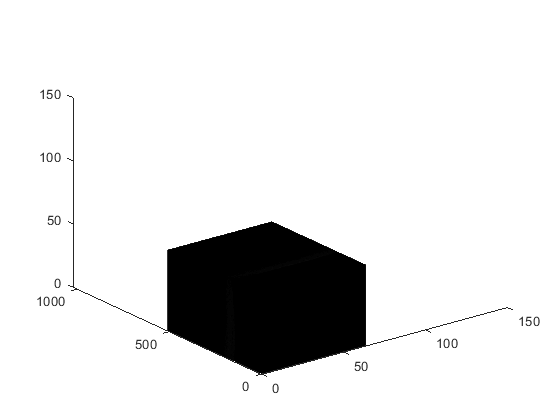

In [4]:
% 代码段4
% Start Inverting
% 开始倒置
display('Inverting...');
tic;

% Step 1: Scale radiometric component
% See 2.1.5 Validating radiometric falloff for details
if (isdiffuse)
    data = data.*(grid_z.^4);
else
    data = data.*(grid_z.^2);
end

% Step 2: Resample time axis and pad result
% M: 512
% N:64, t-y-x
% 将x，y，t三轴均扩展2倍，以重采样
% 重采样：可分为downsampling和upsampling

% tdata: 1024*128*128
tdata = zeros(2.*M,2.*N,2.*N);
% mtx: 512*512
% data: 512*64*64
% data(:,:): 512*4096,将64个512*64的平面并到一起，故为512*4096
% mtx*data(:,:): 512*4096
% [M N N]: 512*64*64
% 故执行下面一行后，tdata只有1/8不为0
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);

%*************************验证tdata***************************************
% ThreeD: 将三维数组转换为图像
tdata = ones(2.*M,2.*N,2.*N);
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
Three_D(tdata);
tdata = zeros(2.*M,2.*N,2.*N);
tdata(1:end./2,1:end./2,1:end./2)  = reshape(mtx*data(:,:),[M N N]);
%************************************************************************


% Step 3: Convolve with inverse filter and unpad result
% tdata: 1024*128*128
% fftn(tdata): 1024*128*128 complex data
% invpsf: 1024*128*128(complex)
% tvol: 1024*128*128 double
tvol = ifftn(fftn(tdata).*invpsf);

% tvol: 512*64*64 double
% 在此处再次取出1/8
tvol = tvol(1:end./2,1:end./2,1:end./2);

% Step 4: Resample depth axis and clamp results
% mexi: 512*512
% tvol: 512*64*64
% mtxi*tvol(:,:): 512*4096
% vol: 512*64*64
vol  = reshape(mtxi*tvol(:,:),[M N N]);
% 将复数取实部并把负数置为0
vol  = max(real(vol),0);

display('... done.');
time_elapsed = toc;

display(sprintf(['Reconstructed volume of size %d x %d x %d '...
    'in %f seconds'], size(vol,3),size(vol,2),size(vol,1),time_elapsed));
    

display("This cell run successfully")




In [5]:
% 代码段5
% range = M.*c.*bin_resolution; % Maximum range for histogram
% 时间轴变换为z轴，深度为之前的一半
% Review: size(vol,1) segments from 0 to range./2(2.4576/2=1.2288)
% tic_z, tic_x, tic_y 用于画图时固定坐标
% size(vol,1): z方向分辨率
tic_z = linspace(0,range./2,size(vol,1));
% size(vol,2): y方向分辨率
tic_y = linspace(-width,width,size(vol,2));
% size(vol,3): x方向分辨率
tic_x = linspace(-width,width,size(vol,3));

% Crop and flip reconstructed volume for visualization
% 裁剪和反转变换得到的3D复原物体 以 可视化
% ind的含义?????
ind = round(M.*2.*width./(range./2));
% vol: 512*64*64, z*y*x
% 将vol的第三维，即x轴，逆序(反转变换)
vol = vol(:,:,end:-1:1);
% z_offset,去除开始的无效数据
% 1:ind, ind含义尚不理解
vol = vol((1:ind)+z_offset,:,:);

% 对应改变z轴坐标
tic_z = tic_z((1:ind)+z_offset);

% 下一部分开始绘图
display("This cell run successfully")

    "This cell run successfully"




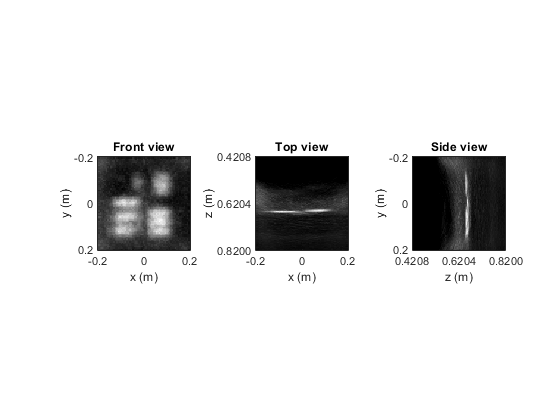

In [6]:
% 代码段6
% View result
figure('pos',[10 10 900 300]);

subplot(1,3,1);
% 前视图即z轴(vol的第一维)的最大值
imagesc(tic_x,tic_y,squeeze(max(vol,[],1)));
title('Front view');
set(gca,'XTick',linspace(min(tic_x),max(tic_x),3));
set(gca,'YTick',linspace(min(tic_y),max(tic_y),3));
xlabel('x (m)');
ylabel('y (m)');
colormap('gray');
axis square;

subplot(1,3,2);
% 俯视图即y轴(vol的第2维)的最大值
imagesc(tic_x,tic_z,squeeze(max(vol,[],2)));
title('Top view');
set(gca,'XTick',linspace(min(tic_x),max(tic_x),3));
set(gca,'YTick',linspace(min(tic_z),max(tic_z),3));
xlabel('x (m)');
ylabel('z (m)');
colormap('gray');
axis square;

subplot(1,3,3);
% 俯视图即z轴(vol的第3维)的最大值
imagesc(tic_z,tic_y,squeeze(max(vol,[],3))')
title('Side view');
set(gca,'XTick',linspace(min(tic_z),max(tic_z),3));
set(gca,'YTick',linspace(min(tic_y),max(tic_y),3));
xlabel('z (m)');
ylabel('y (m)');
colormap('gray');
axis square;


## Supplementary Discussion

### Resolution limits
The accuracy of the reconstructed shape depends on several factors, including the system jitter, the scanning area $2\omega \times 2 \omega$, and the distance of the hidden object from the wall z (Figure 3). Here, the resolution limit is defined as the minimum resolvable distance of two scatterers $\Delta d$. Specifically, two scattering points, q1 and q2, are resolvable in space only if their indirect signals are resolvable in time:

$$\Delta d = abs( \| p-q_{1}\|_{2}-\|p-q_{2}\|_{2})\geq \frac{c\Delta t}{2}$$
equation (23)


Using this formula, a bound on the minimum axial distance, i.e., along the z-axis, can be defined as $\Delta z \geq \frac{c\Delta t}{2}$. In practice, this bound is related to the full width at half maximum (FWHM) of the temporal jitter of the detection system, represented by the scalar	$\gamma$, as
$$\Delta z \geq \frac{c\gamma}{2}$$

As illustrated in Figure 3, the FWHM is a practical means to derive resolution limits of a NLOS imaging system and it is closely related to diffraction-limited resolution limits in microscopy. Alternative resolution criteria include the Rayleigh criterion and the Sparrow limit. However, due to the fact that the temporal point spread functions in NLOS imaging are not Airy disks, the FWHM criterion is an appropriate formulation for this application. If the temporal jitter follows a Gaussian shape, the FWHM is directly proportional to the standard deviation $\sigma$ of the jitter as $\gamma = 2\sqrt{2ln2\sigma}$.

Similarly, we can derive an approximate bound on the lateral resolution $\Delta x$. For this purpose, we assume that $\delta x$ is much smaller than the area of the wall being sampled, such that $cos(\theta)\approx \frac{c\Delta t}{(2\Delta x)}$(see Figure 3(d)).

Then 

\begin{align*}
\frac{c\Delta t}{2}&\approx \Delta x cos(\theta)\\
&\approx \Delta x cos(tan^{-1}(\frac{z}{\omega}))\\
&= \Delta x \frac{\omega}{\sqrt{\omega ^{2} + z^{2}}}\\
\end{align*}

equation 26

Using the FWHM criterion, the minimum lateral distance between two points is

$$\Delta x \geq \frac{c\sqrt{\omega ^{2}+z^{2}}}{2\omega}\gamma$$

Equation 27

    

### Compute time and memory requirements

Here, we list expected runtimes and memory requirements for several non-line-of-sight imaging approaches. The backprojection algorithm, a direct inverse of the light transport matrix, and iterative approaches to solving the inverse problem have been proposed in previous work. The discrete light cone transform introduced in this paper allows a direct inverse of the light transport matrix to be computed with orders of magnitude lower computational complexity and less memory requirements than existing methods. In the following, we assume for simplicity that the recorded histograms sample the hidden volume of resolution $N\times N\times N$ at $N\times N$ locations on the wall. Each of the measured locations is represented as a temporal histogram of length N. Thus, the light transport matrix A is of size $N^3\times N^3$ and it contains $N^5$ non-zero elements that would have to be stored in a sparse matrix representation.


The backprojection algorithm is a matrix-vector product of the transpose light transport matrix and the measurement vector, which has a computational complexity of $O(N^5)$. The backprojection algorithm can be computed without explicitly constructing the matrix, and only requires $O(N^3)$ memory.


Computing the inverse light transport matrix, for example via the singular value decomposition, includes $O(N^9)$ computational complexity for computing the SVD as well as two additional matrix-vector multiplications and a vector-vector multiplication. The overall runtime is still on the order of $O(N^9)$ and the memory requirements just for storing the decompositions is $O(N^6)$ . An attractive alternative to the SVD would be an iterative, large scale solver, such as the conjugate gradient method. In this case, the computational complexity for each iteration would be in the same order as the backprojection algorithm. In practice, it is computationally more efficient to discretize the light transport matrix for use in iterative procedures, $^20$ at the cost of increasing memory requirements to the order of $O(N^5)$. 


The discrete light cone transform (LCT) applies a transformation operation along the time axis $(O(N^3))$, followed by a 3D Fourier transform $(O(N^3logN))$, an element-wise multiplication $(O(N^3))$, an inverse 3D Fourier transform $(O (N^3logN))$, and another transformation operation $(O(N^3))$. The combined computational complexity is $O(N^3logN)$. The alternating-direction method of multipliers (ADMM) and its linearized version (L-ADMM) are iterative algorithms that apply the LCT sequentially along with other, computationally less complex, proximal operators (see Supplementary Derivations). Therefore, the order of the computational complexity per iteration is similar to that of the LCT. The LCT only requires a single volume to be stored in memory, so the memory requirements are several orders of magnitude better than existing methods. ADMM and L-ADMM require several intermediate variables of the same size as the volume to be stored but the order of memory required remains the same as the LCT.

![ComputationRequest](image/ComputationRequest.jpg)


#### 计算时间和存储需求

在这里，我们列出了几种非视距成像方法的预期运行时间和内存要求。 在以前的工作中已经提出了反投影算法，光传输矩阵的直接求逆，以及解决逆问题的迭代方法。在下文中，我们假定为简单起见，该记录的柱状图样的分辨率$N\times N\times$在$N\times N$个位置上。 每个测量位置表示为长度为N的时间直方图。因此，光传输矩阵A的大小为$N^3\times N^3$并且它包含$N^5$非零元素, 并且存储在稀疏矩阵表示中。

反投影算法是转置光传输矩阵和测量矢量的矩阵矢量乘积，其计算复杂度为$O(N^5)$. 可以在不明确构造矩阵的情况下计算反投影算法，并且仅需要$O(N^3)$内存。

计算逆光传输矩阵，例如通过奇异值分解，包括用于计算SVD的$O(N^9)$计算复杂度以及两个额外的矩阵矢量乘法和矢量矢量乘法。整个运行时仍然在$O(N^9)$的数量级，并且仅用于存储分解的内存要求是$O(N^6)$。SVD的有吸引力的替代方案是迭代的大规模求解器，例如共轭梯度方法。在这种情况下，每次迭代的计算复杂度与反投影算法的阶数相同。 在实践中，将光传输矩阵离散化以用于迭代过程在计算上更有效，其代价是将内存需求增加到$O(N^5)$的量级。


离散光锥变换（LCT）沿时间轴$(O(N^3))$应用变换操作，然后是3D傅里叶变换$(O(N^3logN))$，元素乘法$((O(N^3))$，逆3D傅立叶变换$(O(N^3logN))$，以及另一个变换运算$(O(N^3))$。组合的计算复杂度是$ O（N ^ 3logN）$。 乘法器的交替方向（ADMM）及其线性化版本（L-ADMM）是迭代算法，它们将LCT与其他计算复杂度较低的近端算子一起顺序应用（参见补充推导). 因此，每次迭代的计算复杂度的顺序类似于LCT的阶数。 LCT只需要将一个'形状'在内存中，因此内存要求比现有方法好几个数量级。 ADMM和L-ADMM需要几个与要存储的'形状'大小相同的中间变量，但所需的内存阶数与LCT保持一致。

## Supplementary Results


### Real-time non-line-of-sight tracking

Instead of fully recovering the shape of non-line-of-sight objects, one may also be interested in detecting the presence of an object or roughly track its location.[11–13] The minimum number of required sample points to unambiguously track a single 3D object is three. The detector records the time of flight between the three sample points and the NLOS object. A single sample point is ambiguous because the manifold of possible 3D locations of the corresponding object is the surface of a hemisphere. With three measurements, we can compute the intersection of the three respective hemispheres to triangulate the position of the object.

Figure $\ref{Fig13}$ shows the results of tracking the 3D location of a planar traffic sign outside the line of sight of the detector. Three locations on the wall are sampled with mutual distances of approx. 60 cm, as indicated by the red dots. This tracking procedure is performed at interactive framerates with 3Hz and an exposure time of 0.1s per sample. Please also see the Supplementary Video for additional real-time tracking results in outdoor applications.

\begin{figure}
    \centering 
    \includegraphics{image/figs13.png} 
    \caption{Figure 19: Tracking results for a non-line-of-sight retroreflective sign moving across a room. The system records measurements at three different points (shown in red) on a wall as position z = 0, and uses the indirect signal to compute the distance of the sign from the wall. The intersection of three spheres produces 3D coordinates of the sign (shown in blue). The exposure period for each point is 0.1s, producing 3D coordinates at a rate of approximately 3Hz. Measurements become noisier as the object moves away from the wall.} 
    \label{Fig13}
\end{figure}

#### 实时的非视距目标跟踪
人们也可能对检测物体的存在或粗略跟踪其位置感兴趣，而不是完全恢复非视线物体的形状[11-13]。明确跟踪单个3D对象所需的最小样本点数为3。 探测器记录三个采样点和NLOS对象之间的飞行时间。 单个采样点是模糊的，因为相应对象的可能3D位置的流形是半球的表面。 通过三次测量，我们可以计算三个相应半球的交点，以对物体的位置进行三角测量。

图13显示了跟踪探测器视线外的平面交通标志的3D位置的结果。 墙上的三个位置被采样，相互距离约为。 60厘米，如红点所示。 该跟踪过程在3Hz的交互式帧速率下进行，每个样本的曝光时间为0.1s。 另请参阅补充视频，了解户外应用中的其他实时跟踪结果。

# Other Research
Some other researches related about this paper are listed below:

+ Accidental pinhole and pinspeck cameras: Revealing the scene outside the picture, CVPR, 2012
+ 

## 2Accidental pinhole and pinspeck cameras: Revealing the scene outside the picture

CVPR, 2012.

Site: https://ieeexplore.ieee.org/document/6247698

Abstract: We identify and study two types of "accidental" images that can be formed in scenes. The first is an accidental pinhole camera image. The images are often mistaken for shadows, but can reveal structures outside a room, or the unseen shape of the light The second class of accidental images are "inverse" pinhole camera images, formed by subtracting an image with a small occluder present from a reference image without the occluder. The reference image can be earlier frame of a video sequence. The types of accidental images happen in a variety of different situations (an indoor scene illuminated by natural light, a street with a person walking under the shadow of a building, etc.). Accidental cameras can reveal information about the scene outside the image, The lighting conditions, or the aperture by which light enters the scene.

### 2意外的针孔和pinpeck相机：显示图片外的场景


https://ieeexplore.ieee.org/document/6247698


摘要:我们识别和研究可以在场景中形成的两种类型的“偶然”图像。 **第一类**是意外的针孔相机图像。 图像经常被误认为阴影，但可以揭示房间外的结构，或者看不见的光线形状. **第二类**偶然图像是“逆”针孔相机图像，通过从参考中存在的小遮挡物减去图像而形成 没有遮挡物的图像。 参考图像可以是视频序列的较早帧。 意外图像的类型发生在各种不同的情况下（由自然光照射的室内场景，在建筑物的阴影下行走的人的街道等）。 意外相机可以显示有关图像外部场景，光照条件或光线进入场景的光圈的信息。

## 8 Recovering three-dimensional shape around a corner using ultrafast time-of-flight imaging

Nature Communications, 2012

https://www.nature.com/articles/ncomms1747

**Abstract**: The recovery of objects obscured by scattering is an important goal in imaging and has been approached by exploiting, for example, coherence properties, ballistic photons or penetrating wavelengths. Common methods use scattered light transmitted through an occluding material, although these fail if the occluder is opaque. Light is scattered not only by transmission through objects, but also by multiple reflection from diffuse surfaces in a scene. This reflected light contains information about the scene that becomes mixed by the diffuse reflections before reaching the image sensor. This mixing is difficult to decode using traditional cameras. Here we report the combination of a time-of-flight technique and computational reconstruction algorithms to untangle image information mixed by diffuse reflection. We demonstrate a three-dimensional range camera able to look around a corner using diffusely reflected light that achieves sub-millimetre depth precision and centimetre lateral precision over 40 cm×40 cm×40 cm of hidden space.

+ Results:
\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f1Experimentalset-up.jpg} 
    \caption{Resutlts1: Experimental set up.(a) The capture process: we capture a series of images by sequentially illuminating a single spot on the wall with a pulsed laser and recording an image of the dashed line segment on the wall with a streak camera. The laser pulse travels a distance r1 to strike the wall at a point L; some of the diffusely scattered light strikes the hidden object (for example at s after travelling a distance r2), returns to the wall (for example at w, after travelling over r3) and is collected by the camera after travelling the final distance r4 from w to the camera centre of projection. The position of the laser beam on the wall is changed by a set of galvanometer-actuated mirrors. (b) An example of streak images sequentially collected. Intensities are normalized against a calibration signal. Red corresponds to the maximum, blue to the minimum intensities. (c) The 2D projected view of the 3D shape of the hidden object, as recovered by the reconstruction algorithm. Here the same colour map corresponds to backprojected filtered intensities or confidence values of finding an object surface at the corresponding voxel.} 
    \label{Fig1747_1}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f2.jpg} 
    \caption{Results2: Streak image with calibration spot.The calibration spot in a streak image (highlighted with an arrow). The calibration spot is created by an attenuated beam split off the laser beam that strikes the wall in the field of view of the camera. It allows monitoring of the long-term stability of the system and calibration for drifts in timing synchronization.} 
    \label{Fig1747_2}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/ncomms1747-f3.jpg} 
    \caption{Figure 3: Reconstruction algorithm.An illustrative example of geometric reconstruction using streak camera images. (a) Data capture. The object to be recovered consists of a 2 cm×2 cm size square white patch beyond the line of sight (that is, hidden). The patch is mounted in the scene and data is collected for different laser positions. The captured streak images corresponding to three different laser positions are displayed in the top row. Shapes and timings of the recorded response vary with laser positions and encode the position and shape of the hidden patch. (b) Contributing voxels in Cartesian space. For recovery of hidden position, consider the choices of contributing locations. The possible locations in Cartesian space that could have contributed intensity to the streak image pixels p, q, r are the ellipses p′, q′, r′ (ellipsoids in 3D). For illustration, these three ellipse sections are also shown in (a) bottom left in Cartesian coordinates. If there is a single world point contributing intensity to all 3 pixels, the corresponding ellipses intersect, as is the case here. The white bar corresponds to 2 cm in all sub-figures. (c) Backprojection and heatmap. We use a backprojection algorithm that finds overlayed ellipses corresponding to all pixels, Here we show summation of elliptical curves from all pixels in the first streak image. (d) Backprojection using all pixels in a set of 59 streak images. (e) Filtering. After filtering with a second derivative, the patch location and 2-cm lateral size are recovered.} 
    \label{Fig1747_2}
\end{figure}




### 8使用超快速ToF成像恢复角落周围的三维形状

自然 通讯, 2012

https://www.nature.com/articles/ncomms1747

**摘要**:通过散射遮挡的物体的恢复是成像中的重要目标，并且已经通过利用例如相干特性，弹道光子或穿透波长来接近。常用方法使用通过遮挡材料传播的散射光，但如果遮挡物是不透明的则会失败。光不仅通过物体传播而且通过场景中漫反射面的多次反射而散射。该反射光包含关于在到达图像传感器之前由漫反射混合的场景的信息。使用传统相机难以解码这种混合。在这里，我们报告了飞行时间技术和计算重建算法的组合，以解开通过漫反射混合的图像信息。我们展示了一种三维测距相机，能够使用漫反射光在拐角处观察，在40厘米×40厘米×40厘米的隐藏空间内实现亚毫米深度精度和厘米的横向精度。

## Terahertz time-gated spectral imaging for content extraction through layered structures

Nature communications, 2016

**Abstract:**
Spatial resolution, spectral contrast and occlusion are three major bottlenecks for non-invasive inspection of complex samples with current imaging technologies. We exploit the sub-picosecond time resolution along with spectral resolution provided by terahertz time-domain spectroscopy to computationally extract occluding content from layers whose thicknesses are wavelength comparable. The method uses the statistics of the reflected terahertz electric field at subwavelength gaps to lock into each layer position and then uses a time-gated spectral kurtosis to tune to highest spectral contrast of the content on that specific layer. To demonstrate, occluding textual content was successfully extracted from a packed stack of paper pages down to nine pages without human supervision. The method provides over an order of magnitude enhancement in the signal contrast and can impact inspection of structural defects in wooden objects, plastic components, composites, drugs and especially cultural artefacts with subwavelength or wavelength comparable layers.

### 太赫兹时间门控光谱成像，用于通过分层结构进行内容提取

https://www.nature.com/articles/ncomms12665

**摘要:**
空间分辨率，光谱对比度和遮挡是使用当前成像技术对复杂样品进行非侵入性检查的三个主要瓶颈。我们利用亚皮秒时间分辨率以及由太赫兹时域光谱提供的光谱分辨率来计算地从厚度波长相当的层中提取遮挡内容。该方法使用在亚波长间隙处反射的太赫兹电场的统计数据来锁定到每个层位置，然后使用时间选通的光谱峰度来调谐到该特定层上的内容的最高光谱对比度。为了证明，封闭文本内容已经成功地从一堆纸页中提取到九页而无需人工监督。该方法提供了信号对比度超过一个数量级的增强，并且可以影响木制物体，塑料部件，复合材料，药物以及具有亚波长或波长可比较层的文化人工制品中的结构缺陷的检查。

## Reconstructing Transient Images from Single-Photon Sensors

CVPR, 2017

http://www.computationalimaging.org/publications/reconstructing-transient-images-from-single-photon-sensors-cvpr-2017/

**Abstract:** Computer vision algorithms build on 2D images or 3D videos that capture dynamic events at the millisecond time scale. However, capturing and analyzing “transient images” at the picosecond scale—i.e., at one trillion frames per second—reveals unprecedented information about a scene and light transport within. This is not only crucial for time-of-flight range imaging, but it also helps further our understanding of light transport phenomena at a more fundamental level and potentially allows to revisit many assumptions made in different computer vision algorithms.

In this work, we design and evaluate an imaging system that builds on single photon avalanche diode (SPAD) sensors to capture multi-path responses with picosecond-scale active illumination. We develop inverse methods that use modern approaches to deconvolve and denoise measurements in the presence of Poisson noise, and compute transient images at a higher quality than previously reported. The small form factor, fast acquisition rates, and relatively low cost of our system potentially makes transient imaging more practical for a range of applications.

### 基于单光子检测的瞬时图像重建

**摘要:**计算机视觉算法建立在2D图像或3D视频的基础上，可以在毫秒级时间内捕获动态事件。然而，以皮秒级捕获和分析“瞬态图像” - 即每秒一万亿帧 - 揭示了关于场景和光传输的前所未有的信息。这不仅对于飞行时间范围成像至关重要，而且还有助于我们在更基础的层面上进一步理解光传输现象，并且可能允许重新审视在不同计算机视觉算法中做出的许多假设。

在这项工作中，我们设计和评估了一个基于单光子雪崩二极管（SPAD）传感器的成像系统，以捕获皮秒级有源照明的多径响应。我们开发了反演方法，使用现代方法在存在泊松噪声的情况下对测量进行去卷积和去噪，并以比先前报道的更高的质量计算瞬态图像。小尺寸，快速采集速率和相对较低的系统成本可能使瞬态成像对于一系列应用更加实用。 

## Towards Transient Imaging at Interactive Rates with Single-Photon Detectors

ICCP, 2018

**Abstract:**
Active imaging at the picosecond timescale reveals transient light transport effects otherwise not accessible by computer vision and image processing algorithms. For example, analyzing the time of flight of short laser pulses emitted into a scene and scattered back to a detector allows for depth imaging, which is crucial for autonomous driving and many other applications. Moreover, analyzing or removing global light transport effects from photographs becomes feasible. While several transient imaging systems have recently been proposed using various imaging technologies, none is capable of acquiring transient images at interactive framerates. In this paper, we present an imaging system that records transient images at up to 25 Hz. We show several transient video clips recorded with this system and demonstrate transient imaging applications, including direct-global light transport separation and enhanced depth imaging.



### 利用单光子探测器以交互速率进行瞬态成像


**摘要:** 皮秒时间刻度的主动成像揭示了瞬态光传输效应，否则计算机视觉和图像处理算法无法访问。 例如，分析发射到场景中并散射回检测器的短激光脉冲的飞行时间允许深度成像，这对于自动驾驶和许多其他应用是至关重要的。 此外，从照片分析或消除全局光传输效应变得可行。 虽然最近已经提出了使用各种成像技术的几种瞬态成像系统，但是没有一种能够以交互式帧速率获取瞬态图像。 在本文中，我们提出了一种成像系统，可记录高达25 Hz的瞬态图像。 我们展示了使用该系统记录的几个瞬态视频剪辑，并演示了瞬态成像应用，包括直接全局光传输分离和增强深度成像。


# Author's Phd Thesis: Optical Linear Algebra for Computational Light Transport

Matthew O'Toole Phd thesis

## 计算光传输的光学线性代数

## Abstract
Active illumination refers to optical techniques that use controllable lights and cameras to analyze the way light propagates through the world. These techniques confer many unique imaging capabilities (e.g. high-precision 3D scanning, image-based relighting, imaging through scatteringmedia), but at a signiﬁcant cost; they often require long acquisition and processing times, rely on predictive models for light transport, and cease to function when exposed to bright ambient sunlight.

We develop a mathematical framework for describing and analyzing such imaging techniques. This framework is deeply rooted in numerical linear algebra, and models the transfer of radiant energy through an unknown environment with the so-called light transport matrix. Performing active illumination on a scene equates to applying a numerical operator on this unknown matrix.

The brute-force approach to active illumination follows a two-step procedure: (1) optically measure the light transport matrix and (2) evaluate the matrix operator numerically. This approach is infeasible in general, because the light transport matrix is often much too large to measure, store, and analyze directly.

Using principles from optical linear algebra, we evaluate these matrix operators in the optical domain, without ever measuring the light transport matrix in the ﬁrst place. Speciﬁcally, we explore numerical algorithms that can be implemented partially or fully with programmable optics. These optical algorithms provide solutions to many longstanding problems in computer vision and graphics, including the ability to (1) photo-realistically change the illumination conditions of a given photo with only a handful of measurements, (2) accurately capture the 3D shape of objects in the presence of complex transport properties and strong ambient illumination, and (3) overcome the multipath interference problem associated with time-of-ﬂight cameras. Most importantly, we introduce an all new imaging regime—optical probing—that provides unprecedented control over which light paths contribute to a photo.




### 摘要
Active illumination 是指使用可控灯和相机的光学技术分析光线传播到世界的方式。 这些技术赋予许多独特的成像能力（例如高精度3D扫描，基于图像的重新照明，通过散射的媒体成像），但成本很高; 它们往往需要很长的采集和处理时间，依赖用于光传输的预测模型，并且当暴露在明亮的环境阳光下时停止工作。

我们开发了一个用于描述和分析这种成像技术的数学框架。 该框架深深扎根于数值线性代数，并利用所谓的光传输矩阵模拟辐射能量通过未知环境的传递。 在场景上执行Active illumination等同于在此未知矩阵上应用数值运算符。

主动照明的蛮力方法遵循两步程序：1.光学测量光传输矩阵; 2.以数字方式评估矩阵算子。 这种方法通常是不可行的，因为光传输矩阵通常太大而无法直接测量，存储和分析。

利用光学线性代数的原理，我们在光学领域中评估这些矩阵算子，而无需首先测量光传输矩阵。 具体而言，我们探索可以使用可编程光学器件部分或全部实现的数值算法。 这些光学算法为计算机视觉和图形中的许多长期问题提供了解决方案，包括**（1）仅用少量测量照片逼真地改变给定照片的照明条件的能力，（2）在存在复杂的传输特性和强烈的环境照明的情况下, 准确地捕获物体的3D形状（3）克服与飞行时间相关的多径干扰问题。** 最重要的是，我们引入了一种全新的成像方式 - **光学探测** - **可以对光路对照片的贡献提供前所未有的控制**。

## Introduction
The interaction between light and matter produces a wide array of complex optical phenomena. On a clear day, the particles within the atmosphere scatter light of shorter (blue) wavelengths much more strongly than longer (red) wavelengths to produce a blue sky. At sunset, sunlight must travel a much longer distance through the atmosphere to reach an observer; thus, light at shorter wavelengths scatters away before reaching the observer to produce the appearance of an orange or red sun. The visible spectrum of light appears in rainbows after a rainy day by the way white light disperses through raindrops. Wavy water surfaces refract and focus light to form caustics along lake and sea beds. The scattering of light through participating media produces clouds and fog. Despite its complex nature, this interaction between light and matter is easy to appreciate for its beauty and is basic to our experience of the world. 

The aim of computational light transport is to analyze such interaction with controllable lights and cameras. The term active imaging refers to sensing devices that use controllable light sources to probe an environment, by sending a light signal into a scene and detecting the light reﬂected in response. This is in contrast with the term passive imaging, reserved for devices that simply detect the naturally occurring light from an environment. For example, a camera is a device that can act either passively or actively; modern cameras are commonly built with ﬂash bulbs that can actively discharge a burst of light when operating under low-light conditions. 

Besides ﬂash photography, there is a long history of devices that rely on active illumination. In the mid-1920s, photoelectric cells captured some of the ﬁrst “moving photos” by raster scanning a spot of light across a subject at fast rates [113]. In the 1950s, the introduction of confocal microscopes increased the resolution of microscopes by means of rejecting all scattered light emanating from the out-of-focus regions of a volumetric specimen [85]. The ﬁnite time required for light to travel from a source, to a target, and back to a detector—its “time-of-ﬂight”—was used in combination with the constant speed of light to calculate the distance of objects in the early 1960s [93]. In 1980, photometric stereo was introduced to compute surface orientation from the appearance of objects lit under diﬀerent lighting conditions [136]. 

Unfortunately, there are several pitfalls when it comes to using active illumination. Many techniques require hundreds or even thousands of measurements [112, 114, 132], producing bandwidth, storage, and processing issues. Moreover, a common assumption is that these measurements are repeatable over time (i.e. the scene is static, or the acquisition period is short enough that the scene appears to be static). These techniques can be inaccurate for complex scenes, particularly when light “misbehaves” [40]. And outdoors, simply detecting the active illumination in the presence of overwhelmingly strong sunlight is a challenge [44, 83]. 

This thesis presents a mathematical framework for describing and analyzing active illumination. The underpinning principle is the linear relationship between emitted and received light signals, represented by a scene’s light transport matrix [22, 91]. Analyzing a scene with active illumination is tantamount to applying a mathematical operator on this light transport matrix. Though the study of algorithms for performing matrix operations—numerical linear algebra—is remarkably mature [123], evaluating a matrix operator to analyze the light transport matrix remains a signiﬁcant challenge for two simple reasons: the light transport matrix is unknown and is often too large to measure, store, or analyze directly.

To overcome these practical issues, this thesis draws inspiration from work on analog optical computing: processing data with light sources, modulators, lenses, and detectors. More than forty years ago, analog optical computing sought to revolutionize the ﬁeld of information processing [35, 75]. Its key tenet was that the speed and parallelism of light enables very high data rates, especially for signal processing and pattern recognition tasks [4]. Although the versatility and rapid advance of microprocessors ultimately overshadowed optical computing’s early ambitions, the designs studied were very diverse; examples range from general-purpose optical computers [38] to highly specialized ones for matrix calculations [5, 72]. This thesis is a ﬁrst attempt to apply optical computing principles to computational light transport. Its aim is to demonstrate that one can eﬃciently analyze the light transport matrix of real-world scenes by applying concepts from numerical linear algebra to the optical domain with controllable lights and cameras. 

The main contribution of this thesis is a framework for analyzing the transport matrix without capturing many photos or relying on expensive processing requirements. The thesis proposes solving longstanding problems in vision and graphics by designing new imaging systems, these systems represent optical-domain implementations of matrix operations and are thus well founded mathematically, and these are experimentally shown to push the state of the art. We achieve the ability to

+ photo-realistically manipulate the illumination conditions of a given photo with only a handful of measurements;
+ directly acquire photos previously thought impossible to capture in a single shot, in which speciﬁc light paths have been blocked, attenuated, or enhanced;
+ accurately capture the 3D geometry of scenes having complex light transport properties;
+ eﬃciently perform active 3D scanning in brightly-lit environments (e.g. under sunlight); and
+ overcome the multipath interference problem associated with time-of-ﬂight cameras.

### 介绍
光与物质之间的相互作用产生了大量复杂的光学现象。 在晴天，大气中的粒子比较长（红色）波长更强烈地散射更短（蓝色）波长的光，以产生蓝天。 在日落时，阳光必须穿过大气层更长的距离才能到达观察者; 因此，较短波长的光在到达观察者之前散开，产生橙色或红色太阳的外观。 在雨天，白光透过雨滴的方式，可见光谱出现在彩虹中。 波浪状的水面折射并聚焦光线，沿湖泊和海床形成焦散。 通过参与媒体散射光会产生云雾。 尽管它的复杂性，光与物质之间的这种相互作用很容易被欣赏，因为它的美丽是我们对世界经验的基础。

计算光传输的目的是分析与可控灯和摄像机的这种交互。 术语主动成像是指使用可控光源探测环境的感测装置，通过将光信号发送到场景中并检测响应中反射的光。 这与术语被动成像形成对比，后者被保留用于简单地检测来自环境的自然发生的光的设备。 例如，相机是可以被动地或主动地动作的设备; 现代摄像机通常采用荧光灯泡制造，在低光照条件下操作时可以主动释放一束光。

除了闪光灯摄影外，主动照明的设备也有很长的发展史。 在20世纪20年代中期，光电池通过光栅快速扫描物体上的光点来捕获一些第一个“移动照片”[113]。 在20世纪50年代，共聚焦显微镜的引入通过拒绝从体积标本的离焦区域发出的所有散射光来提高显微镜的分辨率[85]。 光从光源到目标，再到探测器所需的有限时间 - 它的“飞行时间” - 与恒定光速结合使用，以计算早期物体的距离(在20世纪60年代)[93]。 1980年，引入光度立体声来计算在不同光照条件下点亮的物体外观的表面取向[136]。

不幸的是，在使用主动照明方面存在一些缺陷。 许多技术需要数百甚至数千次测量[112,114,132]，从而产生带宽，存储和处理问题。 此外，一个共同的假设是这些测量值随时间是可重复的（即场景是静态的，或者采集周期足够短以至于场景看起来是静态的）。 对于复杂的场景，这些技术可能是不准确的，特别是当光线“行为不端”时[40]。 在室外，仅仅只是在极强的阳光照射下进行主动照明便是一项挑战[44,83]。

本文提出了一个描述和分析主动照明的数学框架。 其基础原理是发射光信号和接收光信号之间的线性关系，由场景的光传输矩阵[22,91]表示。 分析具有主动照明的场景等同于在该光传输矩阵上应用数学运算符。 尽管用于执行矩阵运算的算法 - 数值线性代数的研究非常成熟[123]，但评估矩阵运算符来分析光传输矩阵仍然是一个重大挑战，原因有两个：**1. 光传输矩阵未知**; **2. 光传输矩阵通常如此的大以至于无法直接测量，存储或分析。**

为了克服这些实际问题，**本文从模拟光学计算的工作中汲取灵感：利用光源，调制器，透镜和探测器处理数据。四十多年前，模拟光学计算试图彻底改变信息处理领域[35,75]。其关键原则是光的速度和并行性能够实现非常高的数据速率，特别是对于信号处理和模式识别任务[4]。虽然微处理器的多功能性和快速发展最终掩盖了光学计算的早期雄心，但关于模拟光学计算的研究和设计非常多样化;例子包括通用光学计算机[38]到高度专业化的计算机[5,72]。本论文是将光学计算原理应用于计算光传输的第一次尝试。其目的是通过将数值线性代数的概念应用于具有可控光和相机的光学域，证明人们可以有效地分析现实世界场景的光传输矩阵。**

本论文的主要贡献是分析传输矩阵的框架，且无需捕获许多照片或依赖昂贵的处理要求。 本文提出通过设计新的成像系统来解决视觉和图形中长期存在的问题，这些系统代表了矩阵运算的光域实现，因此在数学上具有良好的基础，并且这些通过实验证明可以推动现有技术发展。 我们实现了以下任务:

+ 通过少量测量，相片级逼真(photo-realistically)地操纵给定照片的照明条件;
+ 直接获取以前认为不可能一次拍摄的照片，其中特定的光路被阻挡，衰减或增强;
+ 准确捕捉具有复杂光传输特性的场景的3D几何;
+ 在明亮的环境中（例如在阳光下）进行有效的3D扫描;
+ 克服与飞行时间(ToF)相机相关的多径干扰问题。

### The Light Transport Matrix
A common assumption made throughout computer graphics and vision is the linearity of light transport. The interaction of light with a scene can be described mathematically in terms of a simple linear relation known as the light transport equation (Figure \ref{Fig1.1}) [22, 91]:
\begin{figure}
    \centering 
    \includegraphics{image/phd1.1.jpg} 
    \caption{The light transport equation.} 
    \label{Fig1.1}
\end{figure}

\begin{equation} \label{eq1.1}
i=Tp
\end{equation}

where the vector p of length P represents the radiant energy emitted by P controllable light sources during an exposure period of length T seconds (s), the vector i of length I represents the radiant energy incident on each of I sensors during the same exposure period, and T is the scene’s I ×P light transport matrix. Element T[m,n] of the transport matrix is a unitless value describing the fraction of radiant energy transmitted from source n that reaches sensor m. If the matrix T is known, the light transport equation predicts the appearance of the scene under any given illumination conditions—with light paths representing various transport phenomena (e.g. caustics, inter-reﬂections) all included. Sections \ref{light-sources-and-cameras} and \ref{light-paths} discuss the components of the light transport equation in further detail. 

But ﬁrst, we start by describing one of the basic radiometric quantities associated with the light transport equation: radiant energy. Radiometric quantities that depend on diﬀerential areas and angles (e.g. radiance and irradiance [125]) are omitted from this discussion to highlight a key point: the light transport equation is an abstract model for the transfer of radiant energy and is completely independent from the geometric conﬁguration of light sources, sensors, and scenes.


#### 光传输矩阵
在整个计算机图形和视觉中做出的一个通用的假设是光传输的线性性。 光与场景的相互作用可以用简单的线性关系数学来描述，称为光传输方程（图\ref{Fig1.1}）[22,91]：

\begin{equation} \label{eq1.1c}
i=Tp
\end{equation}

其中长度为P的矢量**p**表示在长度为T秒（s）的曝光时段期间由P可控光源发射的辐射能量，长度为I的矢量**i**表示在相同曝光时段期间入射在每个I传感器上的辐射能量。T是场景的I×P光传输矩阵。 传输矩阵的元素T [m，n]是无单位值，描述从源n到达传感器m的辐射能量的分数。 如果矩阵T是已知的，则光传输方程可以任何给定的照明条件下预测场景的外观---光路包括各种传输现象（例如焦散，相互反射）。 章节\ref{light-sources-and-cameras}和\ref{light-paths}更详细地讨论了光传输方程的组成部分。 

但首先，我们描述与光传输方程相关的基本辐射量之一：辐射能量。 在此讨论中省略了取决于不同区域和角度的辐射量（例如辐射度和辐照度[125]）以突出关键点：**光传输方程是用于辐射能量传递的抽象模型，并且完全独立于几何 光源，传感器和场景的配置**。


#### Radiant Energy
Light is composed of photons, elementary particles that carry discrete bundles of energy along light paths at the speed of light. The energy of a photon E, measured in joules (J), is inversely proportional to its wavelength (i.e. its “color”):

\begin{equation} \label{eq1.2}
E = \frac{hc}{\lambda}
\end{equation}

where the wavelength λ is measured in meters (m), c ≈ 2.998×108 m/s is the speed of light, and h ≈ 6.626×10−34 J·s is the Planck constant. Because shorter wavelengths correspond to higher energy, “blue” photons (λ ≈ 450 nm) have higher energy than “red” photons (λ ≈ 650 nm). Radiant energy is the energy of N photons, measured by summing the energy of the N individual photons. 

The value of element p[n] in the light transport equation describes the radiant energy emitted by light source n, and the value of element i[m] describes the radiant energy incident on sensor m. The light transport equation assumes that the distribution of energy radiated at diﬀerent wavelengths is ﬁxed for each light source p[n].


##### 辐射能量
光由光子组成，光子即基本粒子沿光路以光速传输离散的能量束。 以焦耳（J）为单位测量的光子E的能量与其波长（即其“颜色”）成反比：

\begin{equation} \label{eq1.2c}
E = \frac{hc}{\lambda}
\end{equation}

其中波长λ以米（m）为单位测量，c≈2.998×108 m / s是光速，h≈6.626×10-34 J·s是普朗克常数。 因为较短的波长对应于较高的能量，所以“蓝色”光子（λ≈450nm）具有比“红色”光子（λ≈650nm）更高的能量。 辐射能是N个光子的能量，通过对N个光子的能量求和来测量。

光传输方程中元素p[n]的值描述了光源n发射的辐射能量，元素i[m]的值描述了入射在传感器m上的辐射能量。 光传输方程假设每个光源p[n]在不同波长辐射的能量分布是固定的。


#### Ambient Light
In addition to the light emitted by controllable sources, uncontrollable light sources (e.g. the sun or room lighting) can also contribute radiant energy to sensors. This ambient light can be modelled by adding a vector a of length I to the right-hand side of the light transport equation, where each element a[m] is the total amount of ambient radiant energy incident on sensor m over the exposure period T.

##### 环境光 
除了可控源发出的光之外，不可控制的光源（例如太阳或室内照明）也可以为传感器提供辐射能量。 该环境光可以**通过在光传输方程的右侧添加长度为I的矢量a来建模**，其中每个元素a [m]是在曝光时间段T内入射在传感器m上的环境辐射能量的总量。

### Light Sources and Cameras
#### 光源与摄像机
#### Cameras
Most modern digital cameras use CCD (charge-coupled device) or CMOS (complementary metaloxide-semiconductor) chips to record radiant energy. Their role is to convert incident radiant energy into readable digital numbers. 

These chips typically contain millions of photosensitive pixels arranged in a regular grid, each of which acts as a light sensor. A photon striking a pixel can generate an electron through the physical process known as the photoelectric eﬀect, and the electron emitted in this manner is known as a photoelectron [51]. This eﬀect can be attributed to a transfer of energy from the absorbed photon to the emitted photoelectron. The quantum eﬃciency (QE) of a chip is the ratio of the number of emitted photoelectrons to the number of absorbed photons, a quantity that depends on the wavelength of light. 

Each pixel accumulates photoelectrons over an exposure time T. Once this time elapses, the number of photoelectrons are read from each pixel as an ampliﬁed analog signal. An analog-todigital converter (ADC) quantizes the analog signal into a digital number known as a pixel value. 

We describe the measured pixel values of RAW (i.e. unprocessed) images as follows [51]:

\begin{equation} \label{eq1.3}
\hat{\textbf{i}} = min\{\Phi \textbf{i}/g+i_{offset}+\textbf{n}+i_{max}/g\}
\end{equation}

where the vector i of length I represents the radiant energy generated for each of the I pixels, and the vector ˆ i contains the corresponding pixel values. The vector Ψi represents the number of generated photoelectrons, where the scalar Ψ is the ratio of the quantum eﬃciency over the energy of a single photon (assuming a speciﬁc wavelength λ). The controllable scalar g represents sensor gain (the ampliﬁcation factor applied to the analog signal); this is controlled by selecting an ISO value (the standardized industry scale for gain) where larger ISO values correspond to smaller g values. The constant ioﬀset describes a sensor’s black level (the pixel value associated with pure black), and the scalar imax represents the full-well capacity (the amount of photoelectrons a pixel can hold). The random vector n represents sensor noise accumulated throughout the sensing pipeline, and is described in more detail in Section \ref{noise}. 

Imaging techniques exist to accurately convert pixel values back to radiant energy. Our approach is to invert Eq. (1.3) by (1) appropriately controlling gain g and exposure time T to avoid pixel saturation, (2) capturing a single RAW photo, (3) subtracting the scalar ioﬀset from the photo’s pixel values, and (4) multiplying the result with scalar g/Ψ. Merging multiple photos, each captured with diﬀerent exposure and gain settings, is another well-established approach to accurately measure radiant energy [23, 51], especially for scenes with a high dynamic range where the ratio between the largest and smallest radiant energy values is large.



##### 摄像机
大多数现代数码相机使用CCD（电荷耦合器件）或CMOS（互补金属氧化物半导体）芯片来记录辐射能量。 它们的作用是将入射辐射能量转换为可读数字数字。

这些芯片通常包含以规则网格排列的数百万个光敏像素，每个光敏像素用作光传感器。 撞击像素的光子可以通过称为光电效应的物理过程产生电子，以这种方式发射的电子称为光电子[51]。 这种效应可以归因于从吸收的光子到发射的光电子的能量转移。 芯片的量子效率（QE）是发射的光电子数与吸收的光子数之比，该数量取决于光的波长。

每个像素在曝光时间T内累积光电子。一旦经过该时间，从每个像素读取光电子的数量作为放大的模拟信号。 模拟 - 数字转换器（ADC）将模拟信号量化为称为像素值的数字数字。

我们描述RAW（即未处理）图像的测量像素值如下[51]：

\begin{equation} \label{eq1.3c}
\hat{\textbf{i}} = min\{\Phi \textbf{i}/g+i_{offset}+\textbf{n}+i_{max}/g\}
\end{equation}

其中长度为I的向量$\hat{i}$表示为每个I像素生成的辐射能量，并且向量i包含对应的像素值。 矢量Ψi表示生成的光电子的数量，其中标量Ψ是量子效率与单个光子的能量之比（假设特定波长λ）。 可控标量g代表传感器增益（应用于模拟信号的放大系数）; 这是通过选择ISO值（增益的标准化工业规模）来控制的，其中较大的ISO值对应于较小的g值。 常数$i_{offset}$集描述了传感器的黑电平（与纯黑相关的像素值），标量$i_{max}$表示全阱容量（像素可以容纳的光电子量）。 随机向量n表示在整个传感流水线中累积的传感器噪声，并在\ref{noise}节中有更详细的描述。

存在能够准确地将像素值转换回辐射能量的成像技术。 我们的方法是反转等式（1.3）通过（1）适当地控制增益g和曝光时间T以避免像素饱;（2）捕获单个RAW照片;（3）从照片的像素值中减去标量$i_{offset}$;（4）将结果乘以标量$\frac{g}{\Phi}$。 合并多张照片，每张照片都采用不同的曝光和增益设置拍摄，是另一种精确测量辐射能量的成熟方法[23,51]，特别是对于具有高动态范围的场景，其中最大和最小辐射能量值之间的比率较大。

#### Light Sources
Throughout this thesis, we use projectors as our controllable source of illumination, where every projector pixel is itself a controllable light source. 

We frequently use radiant power to describe the rate at which energy is emitted by these light sources. Radiant power is deﬁned as the rate of emitted (or received) radiant energy per unit time, measured in watts ($W = J·s^{−1}$): 

\begin{equation} \label{eq1.4}
\Phi = \frac{dE}{dt}
\end{equation}

where time t is measured in seconds. A light source produces total energy ΦT measured in joules after time T. Luminous power, measured in lumens (lm), is the photometric equivalent to radiant power [122]. Lumens represent the perceived power of light, accounting for the varying sensitivity of the human eye to diﬀerent wavelengths of light. 

We rely on three diﬀerent projector technologies for illumination: DLP (digital light processing), LCD (liquid crystal display), and MEMS (microelectromechanical systems) projectors. In a DLP projector, the image is created by selectively reﬂecting light with an array of mirrors, known as a Digital Micromirror Device (DMD); each mirror represents a projector pixel that can be rapidly toggled on or oﬀ. A LCD projector passes light through an array of liquid crystal cells, whose transmittance can be controlled electronically. A MEMS laser projector uses a mirror that can pan and tilt to scan a laser beam across a scene; as the beam moves across the scene, the projector modulates the beam intensity to produce the desired image.



##### 光源
在整个论文中，我们使用聚光灯(projectors)作为我们可控的照明光源，其中每个projector像素本身都是可控光源。

我们频繁使用**辐射功率**来描述这些光源发出能量的速率。 辐射功率定义为每单位时间发射（或接收）辐射能量的速率，以瓦特为单位（$W = J·s^{-1}$）：

\begin{equation} \label{eq1.4c}
\Phi = \frac{dE}{dt}
\end{equation}

其中时间t以秒为单位测量。 在时间T之后，光源产生以焦耳为单位测量的总能量ΦT。以流明（lm）为单位测量的发光功率是光度等效于辐射功率[122]。 流明代表光的功率，即人眼对不同波长的光的不同灵敏度(?)。

我们依靠三种不同的投影技术进行照明：DLP（数字光处理），LCD（液晶显示器）和MEMS（微机电系统）投影仪。 在DLP投影仪中，通过用一系列镜子（称为数字微镜器件（DMD））选择性地反射光来创建图像。 每个镜像代表一个可以快速切换或关闭的投影像素。 LCD投影仪使光通过一系列液晶单元，其透射率可以通过电子方式控制。 MEMS激光投影仪使用可以平移和倾斜的镜子来扫描场景中的激光束; 当光束在场景中移动时，投影仪调制光束强度以产生所需图像。

#### Noise
Random ﬂuctuations or uncertainty in physical events (e.g. the detection of photoelectrons) is known as noise. Camera sensors have three primary sources of noise: read noise, photon noise, and quantization noise. 

\begin{equation}
\label{eq1.5}
n = n_{read} + n_{photon} + n_{quantization}
\end{equation}

Each element n[m] is a randomly sampled value that impacts the measured pixel value $\hat{i}[m]$, as explained in Eq. (\ref{eq1.3}).

Read noise, $n_{read}$, is the electronic noise introduced by the sensor prior to analog-to-digital conversion. The random values of vector nread are typically modelled with a mean-zero Gaussian distribution having standard deviation σ. This noise is independent at each pixel, and independent of the signal intensity. The value of the standard deviation σ depends on the gain setting g and the speciﬁcations of the sensor itself.

Photon noise, nphoton, exists because of the discrete nature of electron and photon particles, and the assumption that the emission or detection of individual photons can be treated as independent events. Although the expected number of photoelectrons detected by a pixel, Ψi[m], can be any non-negative real value, the actual number of photoelectrons detected, x[m], must be integer. The probability of a pixel observing exactly k photoelectrons is described by the Poisson distribution:

\begin{equation}
\label{eq1.6}
Pr(\textbf{x}[m]=k)=\frac{(\Phi i[m])^{k}e^{-\Phi I[m]}}{k!}
\end{equation}

where e ≈ 2.718 is Euler’s number, k! is the factorial of k, and $x = \Phi i + gn_{photon}$. The mean and variance of the Poisson distribution is $\Phi i$. It follows that the mean value of the noise vector nphoton is zero, and its variance is $\Phi i/g^{2}$. When the number of expected photoelectrons is large, the probability distribution function can be closely approximated with a Gaussian distribution.

Quantization noise, $n_{quantization}$, represents the round-oﬀ error introduced by the analog-todigital conversion step. Speciﬁcally, there exists a range of analog signals that produce the same digital number after quantization, and the vector $n_{quantization}$ is the diﬀerence between the original and quantized signals. Quantization noise can be modelled as a uniformly distributed random value between $−\frac{b}{2}$ and $\frac{b}{2}$, where the scalar b is the least signiﬁcant bit of the digital pixel value. The variance of a continuous uniform distribution with spread b is $\frac{1}{12}b^{2}$

The signal-to-noise ratio (SNR) of $\hat{i}$ characterizes image quality as the ratio between its digital pixel value and the standard deviation of its noise:

\begin{equation}
\label{eq1.7}
SNR(\hat{i})=20log10[\frac{E[\hat{i}]}{\sqrt{Var(n)}}]
\end{equation}

Here, we express this ratio in decibels (dB), a logarithmic unit of measurement typically associated with SNR. Given the image formation model in Eq. (\ref{eq1.3}) and the noise terms in Eq. (\ref{eq1.5}), the expression for the SNR of digital sensors can be expanded to

\begin{equation}
\label{eq1.8}
SNR(\hat{i})=20log_{10}[\frac{\Phi i/g}{\sqrt{\sigma ^{2}+\Phi i/g^{2}+\frac{1}{12}b^{2}}}]
\end{equation}

where we assume that the signal $\hat{i}$ is not saturated, and the constant ioﬀset representing the sensor’s black level is subtracted from the measured pixel value. An image with mean SNR 20 dB (i.e. a 10:1 ratio between signal and noise) is considered to be of “acceptable image quality”, and an image with mean SNR 32.04 dB (i.e. a 40:1 ratio) has “excellent image quality” [100].

##### 噪声

物理事件中的随机波动或不确定性（例如光电子的检测）被称为噪声。 相机传感器有三个主要噪声源：读取噪声，光子噪声和量化噪声。

\begin{equation}
\label{eq1.5c}
n = n_{read} + n_{photon} + n_{quantization}
\end{equation}

每个元素n [m]是一个随机采样的值，它影响测量的像素值$\hat{i}[m]$，如公式\ref{eq1.3c}所述。

读取噪声$n_{read}$是传感器在模数转换之前引入的电子噪声。 矢量nread的随机值通常用具有标准偏差σ的均值 - 零高斯分布建模。 该噪声在每个像素处是独立的，并且与信号强度无关。 标准偏差σ的值取决于增益设置g和传感器本身的规格。

由于电子和光子粒子的离散性质，以及单个光子的发射或检测可被视为独立事件的假设，故存在光子噪声,$n_photon$。 尽管由像素检测的预期光电子数Ψi[m]可以是任何非负实数，但是检测到的实际光电子数x [m]必须是整数。 通过泊松分布描述像素精确观察k个光电子的概率：

\begin{equation}
\label{eq1.6c}
Pr(\textbf{x}[m]=k)=\frac{(\Phi i[m])^{k}e^{-\Phi I[m]}}{k!}
\end{equation}

其中e≈2.718是欧拉数，k！ 是k的阶乘，$x=\Phi i+gn_{photon}$。 泊松分布的均值和方差是$\Phi i$。由此得出噪声向量$n_{photon}$的平均值为零，其方差为$\Phi i/g^{2}$。 当预期光电子的数量很大时，概率分布函数可以用高斯分布近似地近似。

量化噪声$n_{quantization}$表示由模拟 - 数字转换步骤引入的舍入误差。 具体而言，存在一系列模拟信号，其在量化之后产生相同的数字数，并且向量$n_{quantization}$是原始信号和量化信号之间的差异。 量化噪声可以被建模为$-\frac{b}{2}$和$\frac{b}{2}$之间的均匀分布的随机值，其中标量b是数字像素值的最小重要位。 具有扩展(LSB)b的连续均匀分布的方差是$\frac{1}{12}b^{2}$

$\hat{i}$的信噪比（SNR）将图像质量表征为其数字像素值与其噪声标准偏差之间的比率：

\begin{equation}
\label{eq1.7}
SNR(\hat{i})=20log10[\frac{E[\hat{i}]}{\sqrt{Var(n)}}]
\end{equation}

在这里，我们以分贝（dB）表示这个比率，这是一个通常与SNR相关的对数测量单位。 鉴于式\ref{eq1.3c}中的图像形成模型和式\ref{eq1.5c}中的噪声项，数字传感器的SNR表达式可以扩展到

\begin{equation}
\label{eq1.8}
SNR(\hat{i})=20log_{10}[\frac{\Phi i/g}{\sqrt{\sigma ^{2}+\Phi i/g^{2}+\frac{1}{12}b^{2}}}]
\end{equation}

我们假设信号$\hat{i}$未饱和，并且从测量的像素值中减去表示传感器黑色电平的常数$i_{offset}$设置。 平均信噪比为20 dB（即信号与噪声之间的比率为10：1）的图像被认为是“可接受的图像质量”，平均信噪比为32.04 dB（即40：1比率）的图像具有“出色的图像” 质量“[100]。

### Light Paths

We adopt the geometric optics model for light transport, where light travels along straight lines known as rays. When light strikes a surface, light may be reﬂected or refracted along a new ray. A light path is a sequence of rays connecting any two points (e.g. source and sensor). 

Figure \ref{Fig1.2} illustrates two important light paths in a projector-camera system: direct paths, and indirect paths. Direct paths are light paths that interact with at most one scene point, whereas indirect paths interact with two or more scene points. Note that, in practice, a camera pixel records light from a bundle of direct (and indirect) paths, because the physical area of a pixel is non-zero. Similarly, a projector pixel emits a bundle of direct (and indirect) paths. 

\begin{figure}
    \centering 
    \includegraphics{image/phd1.2.jpg} 
    \caption{**Light paths for a projector-camera system.** There are many ways for light to reach the camera. There are direct paths (black), where light travels from the projector, to a single scene point, and back to the camera. There are also indirect paths (red, green), where light interacts with multiple scene points before reaching the camera. We also classify indirect paths as being either specular or diﬀuse. A diﬀuse indirect path (red) scatters at two or more diﬀuse points, and a specular indirect path (green) interacts with at most one diﬀuse scene point. Note that the mirror specularly redirects—rather than scatters—the green light path.} 
    \label{Fig1.2}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/phd1.3.jpg} 
    \caption{**Components of light transport.** We use a projector and a camera to approximate diﬀerent components of light transport for a real scene; more details in Chapter 3 and Section 3.4. (a) A regular photo of the scene records all light, regardless of how it reaches the sensor. From left to right, the scene contains a mirror, a bar of soap, and an open book. The mirror specularly reﬂects light onto the wall behind the scene; light penetrates the surface of the bar of soap, scatters multiple times, and exits the surface at another point; some light specularly reﬂects oﬀ the surface of the soap; and the open book diﬀusely inter-reﬂects light between its pages. (b) The direct component represents all light going from the source, to a point in the scene, and directly back to the camera. Note that the light reﬂected by the mirror no longer appears on the wall. (c) The indirect component includes the light reﬂected by the mirror, the sub-surface scattering induced by the soap, and the light inter-reﬂecting within the open book. (d) The majority of direct light is a result of diﬀuse scattering. Here, the bar of soap appears very dark, because its appearance in (a) is due to specular highlights and sub-surface scattering. (e) The specular direct component captures the soap’s specular highlight. (f) Diﬀuse inter-reﬂections and sub-surface scattering are examples of diﬀuse indirect transport. (g) The specular indirect component includes light travelling from the source, to the mirror, to the wall, and back to the sensor; it also includes light going from the source, to the wall, to the mirror, and back to the sensor. Because the indirect components are dim relative to the direct components, we brighten (c), (f), and (g) by a factor of 2.} 
    \label{Fig1.3}
\end{figure}


#### 光路

我们采用几何光学模型进行光传输，光沿着称为光束的直线传播。 当光线照射到表面时，光束可能会沿着新的光路反射或折射。 光路是连接任何两个点（例如光源和传感器）的光束序列。

图\ref{Fig1.2}显示了投影- 相机系统中的两个重要光路：直接路径和间接路径。 直接路径是与最多一个场景点交互的光路，而间接路径与两个或多个场景点交互。 注意，实际上，因为由于一个像素点的物理区域不为零,相机像素记录来自一束直接（和间接）路径的光。 类似地，投影仪像素发出一束直接（和间接）路径。

(改编)直接路径有两类:镜面反射直接路径和散射直接路径.

我们还定义了两个新类别来对不同的间接光路进行分类：镜面间接路径，以及散射间接路径。 镜面间接路径被镜面反射或折射多次，并且使用的散射不超过一次（例如焦散）。 另一方面，散射间接路径在到达传感器之前在场景内散射两次或更多次（例如，使用相互反射，子表面散射）。

请注意，场景的常规照片会记录所有辐射能量，无论其到达传感器的路径如何。 然而，这张照片也可以看作是多个潜像的总和，每个潜像代表光传输的不同组成部分（图\ref{Fig1.3}）。 例如，照片是直接分量（图\ref{Fig1.3}（b））和间接分量（图\ref{Fig1.3}（c））的总和。



#### Elements of the Light Transport Matrix
The scattering throughput function f(x) represents the radiant energy carried along a light path x [125]. A property of this function is that it depends only on the geometry of the scene itself, and not on the power of the light source. For brevity, we omit a discussion on the geometry of these scattering throughput functions, and instead refer to the in-depth discussion provided by Veach [125]. 

Each element of the transport matrix T[m,n] describes the ratio of radiant energy transmitted along a bundle of light paths, and is the solution to an integral of scattering throughput functions: 

\begin{equation}
\label{eq1.9}
\textbf{T}[m,n]=\int _{\Omega _{m,n}}f(x)d\mu (x)
\end{equation}

where $\Omega_{m,n}$ is the space of light paths connecting source n to sensor m, and µ(x) is the corresponding measure on the space of light paths. In computer graphics, rendering is the process of generating an image from the description of a scene by solving an integral of a similar form [125]. 

A physically-realistic scattering throughput function has several properties. The function must be non-negative (because radiant energy is a non-negative quantity) and must conserve energy: 

\begin{equation}
\label{eq1.10}
0 \leq f(x), 0\leq \textbf{T}[m,n]=\int _{\Omega _{m,n}}f(x)d\mu (x)\leq 1
\end{equation}

The scattering throughput function is also thought to obey the Helmholtz reciprocity principle [125]. Helmholtz reciprocity states that the value of measure f(x) for a light path x does not depend on the direction light travels along said path (i.e. swapping the position of a projector pixel n and camera pixel m produces the same value T[m,n]) [114].



##### 光传输矩阵的元素

散射吞吐量函数f（x）表示沿光路x 携带的辐射能量[125]。 此函数的一个属性是它仅取决于场景本身的几何形状，而不取决于光源的功率。 为简洁起见，我们省略了对这些散射吞吐量函数几何的讨论，而是参考Veach [125]提供的深入讨论。

传输矩阵T [m，n]的每个元素描述了沿光束传输的辐射能量的比率，并且是散射吞吐量函数的积分的解：

\begin{equation}
\label{eq1.9c}
\textbf{T}[m,n]=\int _{\Omega _{m,n}}f(x)d\mu (x)
\end{equation}

其中$\Omega_{m，n}$是连接源n和传感器m的光路空间，$\mu (x)$是光路空间上的相应测量值。 在计算机图形学中，渲染就是通过求解类似形式的积分从场景描述生成图像的过程[125]。

物理上真实的散射吞吐量函数具有若干性质。 该函数必须是非负的（因为辐射能量是非负的）并且必须能量守恒的：

\begin{equation}
\label{eq1.10c}
0 \leq f(x), 0\leq \textbf{T}[m,n]=\int _{\Omega _{m,n}}f(x)d\mu (x)\leq 1
\end{equation}

散射吞吐量函数也被认为遵循亥姆霍兹互易原理[125]。 亥姆霍兹互易性指出光路x的测量值f（x）不依赖于光沿着所述路径行进的方向（即，交换投影仪像素n的位置和相机像素m的位置不会改变$\textbf{T}[m,n]$的值）[114]。



### Light Transport Analysis
After more than a decade of graphics and vision research, there is now a large repertoire of numerical methods available to analyze the matrix T of real-world scenes. Examples include methods for decomposing [7], transposing [114], approximating [30], or inverting [112] the matrix; methods that use its properties for image-based rendering [22] or transport-robust shape acquisition [42]; and imaging techniques that enhance the contribution of speciﬁc light transport components [90, 106]. 

As an introduction to the area, this section focuses on three of the more established works in computational light transport: image-based relighting [46], triangulation-based 3D scanning [116], and dual photography [114].



#### 光传输分析

经过十多年的图形和视觉研究，现在有大量的数值方法可用于分析真实世界场景的矩阵T. 例子包括分解[7]，转置[114]，近似[30]或反转[112]矩阵的方法; 将其属性用于基于图像的渲染[22]或传输鲁棒形状采集[42]的方法; 和增强特定光传输组件贡献的成像技术[90,106]。

作为该领域的介绍，本节重点介绍计算光传输中三个较为成熟的工作：**基于图像的重新照明**[46]，**基于三角测量的3D扫描**[116]和**双重摄影**[114]。

#### Image-based Relighting

Image-based relighting uses the matrix **T** and the light transport equation (Eq. (1.1)) to photorealistically synthesize images under novel lighting conditions [46]. For synthetic lighting conditions **p**, the light transport equation computes a photo of the scene lit under the given lighting conditions. Figure \ref{Fig1.4} shows an example of image-based relighting for a scene containing only two light sources.

The visual eﬀects industry uses image-based relighting to seamlessly place actors into virtual environments [21, 22, 52], by ensuring that the image of the actor is radiometrically consistent with the lighting within the virtual environment. To achieve this, a rig of cameras and light sources captures how an actor appears under diﬀerent lighting directions to construct the light transport matrix. The image of the actor is then photorealistically relit with Eq. (\ref{eq1.1}), before being superimposed onto a computer-generated scene.

\begin{figure}
    \centering 
    \includegraphics{image/phd1.4.jpg} 
    \caption{ **Image-based relighting of a photo**, as ﬁrst proposed by Haeberli [46]. The light transport equation can be used to synthesize photos of a scene under novel illumination conditions. The light transport matrix T used here has size I ×2, representing the I pixels in each photo and the two lamps within the scene. (a) RAW photo corresponding to column T[1] captured using illumination p = [1,0] (left lamp “on”). (b) RAW photo corresponding to column T[2] captured using illumination p = [0,1] (right lamp “on”). (c) RAW photo of the scene captured for p = [1,1] (both lamps “on”). (d) A photo under synthetic lighting, by adding photos (a) and (b). (e) The diﬀerence between the RAW photo (c) and synthetic photo (d). The residual error is dominated by photon noise, which is largest in bright regions of the scenes. (f) A weighted combination of photos (a) and (b), created with the red channel of photo (a) with the blue channel of photo (b).
} 
    \label{Fig1.4}
\end{figure}

##### 基于图像的重新照明

基于图像的重新照明使用矩阵T和光传输方程（方程（ref{eq1.1c}））在新的光照条件下照片级地合成图像[46]。 对于合成照明条件p，光传输方程计算在给定照明条件下点亮的场景的照片。图\ref{Fig1.4}显示了仅包含两个光源的场景的基于图像的重新照明示例.

在视觉效果行业,他们会使用基于图像的重新点亮，通过确保演员的图像与虚拟环境中的照明在辐射测量上一致，将演员无缝地置于虚拟环境[21,22,52]中。 为了实现这一目标，摄像机和光源装置捕捉演员在不同照明方向下如何出现以构建光传输矩阵。 然后，演员的形象在叠加到计算机生成的场景之前按照式\ref{eq1.1c}进行照片级渲染。

#### Triangulation-based 3D Scanning
A triangulation-based 3D scanner uses a projector-camera system (Figure \ref{Fig1.2}) to infer the shape of real-world objects [18, 34, 42, 110, 116]. To ﬁnd the 3D position of a point on the surface of an object, the method ﬁrst establishes a one-to-one correspondence between the projector pixel illuminating the point and the camera pixel observing the same point. Provided that the projector and camera have known calibration and pose, the 3D rays corresponding to these 2D pixels can be easily computed. Triangulation is the process of ﬁnding the intersection of these two rays to recover the 3D point [48]. 

While triangulation-based 3D scanning has not previously been considered a light transport analysis technique, it does in fact represent a rudimentary operation on the transport matrix. This is because the correspondence problem requires identifying the camera and projector pixels that form direct light paths. 

To establish correspondences, the standard approach is to identify the projector pixel n that transfers the most radiant energy to a particular camera pixel m [116]:

\begin{equation}
n=\underset{k}{argmax}\textbf{T}[m,k]
\end{equation}

This approach assumes direct light paths transfer more radiant energy than indirect light paths, so that matrix element T[m,n] represents a direct light path.

The diverse application space of 3D scanners includes digitally documenting works of art (*e.g.* Michelangelo’s David) [77], enabling users to interact with a computer through gestures and poses (*e.g.* Microsoft’s Kinect), replicating objects with 3D printers, and navigating autonomous vehicles and robots through treacherous environments.


##### 基于三角测量的3D扫描

基于三角测量的3D扫描仪使用投影仪 - 相机系统（图1.2）来推断真实世界物体的形状[18,34,42,110,116]。 为了找到物体表面上的点的3D位置，该方法首先在照射该点的投影仪像素与观察相同点的相机像素之间建立一对一的对应关系。 假设投影仪和相机具有已知的校准和姿势，则可以容易地计算与这些2D像素对应的3D光线。 三角测量是发现这两条光线相交以恢复3D点的过程[48]。

虽然以前没有将基于三角测量的3D扫描视为光传输分析技术，但事实上它确实代表了传输矩阵的基本操作。 这是因为对应问题需要识别形成直接光路的相机和投影仪像素。

为了建立对应关系，标准方法是识别将最强的辐射能量?传递到特定相机像素m的投影仪像素n [116]：

\begin{equation}
n=\underset{k}{argmax}\textbf{T}[m,k]
\end{equation}

该方法假设直接光路比间接光路传输更多的辐射能量，因此矩阵元素T [m，n]代表直接光路。

3D扫描仪的多样化应用空间包括数字化艺术作品（例如米开朗基罗的David）[77]，使用户能够通过手势和姿势（例如微软的Kinect）与计算机进行交互，使用3D打印机复制对象，以及导航自动驾驶汽车和 机器人穿过危险的环境。


#### Dual Photography
Dual photography is a method that photorealistically synthesizes an image from the light source’s point of view, by interchanging the roles of sensors and sources (i.e. lights sources behave like sensors, and sensors behave like light sources). This method by Sen et al. [114] exploits the Helmholtz principle, which states that the transfer of radiant energy along a light path does not depend on the direction of propagation.

According to Eq. (\ref{eq1.1}), the radiant energy measured by each sensor m is a weighted sum of transport elements associated with sensor m (i.e.$\Sigma_{n}\textbf{T}[m,n]\textbf{p}[n]$). In dual photography, the radiant energy measured by a light source n is instead a weighted sum of transport elements associated with source n (i.e.$\Sigma_{m}\textbf{T}[m,n]\textbf{r}[m]$), as given by the dual equation: 

\begin{equation}
\textbf{s}=\textbf{T}^{T}\textbf{r}
\label{eq1.12}
\end{equation}

where the matrix $\textbf{T}^{T}$ is the transpose of the light transport matrix, element $\textbf{r}[m]$ is the radiant energy emitted by sensor m, and element s[n] is the radiant energy detected by light source n. For projector-camera systems (Figure \ref{Fig1.2}), this dual equation computationally interchanges the position of the projector and camera within the scene. This signiﬁes that the $m^{th}$ row of transport matrix $\textbf{T}$ is an image of the scene lit by camera pixel m and captured from the projector’s point of view.





##### 双重摄像(对偶)

双摄影是一种通过交换传感器和光源的角色（即光源的行为类似于传感器，传感器的行为类似于光源），从光源的角度进行照片真实地合成图像的方法。 Sen等人的这种方法 [114]利用亥姆霍兹原理，该原理指出沿光路的辐射能量的传递不依赖于传播方向。

根据式(\ref{eq1.1})，每个传感器m测量的辐射能量是与传感器m相关的传输元素的加权和（即$\Sigma_{n}\textbf{T}[m，n]\textbf{p}[n]$）。 在双重摄影中，由光源n测量的辐射能量是与源n相关联的传输元素的加权和（即$\Sigma_{m}\textbf{T}[m，n]\textbf{r}[m]$）,由双重(对偶)等式给出：

\begin{equation}
\textbf{s}=\textbf{T}^{T}\textbf{r}
\label{eq1.12c}
\end{equation}

其中,矩阵$\textbf{T}^{T}$是光传输矩阵的转置，元素$\textbf{r}[m]$是传感器m发出的辐射能量，元素s[n]是光源n检测到的辐射能量.对于投影仪 - 摄像系统（图\ref{Fig1.2}）,这个双重方程计算地交换了场景中投影仪和摄像机的位置。 这意味着$m^{th}$行的传输矩阵$\textbf{T}$是由摄像机像素m点亮并从投影仪的角度捕获的场景图像。

#### Limitations
The main challenge associated with these computational light transport methods (and others) is that they require the matrix T of a scene to be known [92, 112, 114, 132], which is compounded by the fact that the transport matrix is often extremely large. For example, the transport matrix of a one megapixel camera and a one megapixel projector already contains $10^{12}$ elements. Directly measuring such a matrix with a standard 30 Hz camera would require $10^6$ measurements and over 9 hours of acquisition time, all while assuming that the scene remains perfectly static in the conﬁnes of a darkroom. Moreover, assuming the camera records 8-bit pixel values, the uncompressed transport matrix requires one terabyte of storage space.

To deal with these issues, a variety of techniques have been proposed to eﬃciently capture the matrix [22, 27, 30, 97, 99, 111, 114, 115, 130]. Unfortunately, these techniques often require hundreds or thousands of high dynamic range photos for complex scenes, can be computationally demanding, and their performance is hard to characterize in a scene-independent way.



##### 局限性
与这些计算光传输方法（和其他方法）相关的主要挑战是它们需要知道场景的矩阵T [92,112,114,132]，这是由于传输矩阵通常极其大而且复杂的事实。 例如，一百万像素相机和一百万像素投影仪的传输矩阵已经包含$10^{12}$个元素。 使用标准的30 Hz相机直接测量这样的矩阵将需要$10^6$次测量和超过9小时的采集时间，同时假设场景在暗室的连续中保持完全静止。 此外，假设摄像机记录8位像素值，未压缩传输矩阵需要1TB的存储空间。

为了解决这些问题，已经提出了各种技术来有效地捕获矩阵[22,27,30,97,99,111,114,115,130]。 不幸的是，这些技术通常需要数百或数千个用于复杂场景的高动态范围照片，可能在计算上要求很高，并且它们的性能难以以与场景无关的方式表征。

### Overview

One of the key questions addressed in this thesis is how to overcome the bottleneck associated with computational light transport. Motivated by large-scale matrix computations which have been the focus of numerical linear algebra since the 1970s [109], our solution involves optical algorithms that analyze the light transport matrix T without ever measuring the matrix directly. To achieve this, we design algorithms that require nothing more than the ability to compute matrix-vector products, the same operation performed by the light transport equation (Eq. (\ref{eq1.1})). 

Chapter 2\ref{optical-computing-for-fast-light-transport-analysis} ﬁrst introduces the concept of optical linear algebra for analyzing light transport, using a class of iterative methods known as Krylov subspace algorithms. In numerical linear algebra, these Krylov subspace algorithms are among the most successful to probe for eigenvectors of large matrices through matrix-vector products. Chapters 3\ref{optical-probing-by-primal-dual-coding} to 5\ref{energy-efficient-probing-by-homogeneous-matrix-factorization} explore a new regime of imaging known as optical probing, a generalized imaging technique that provides ﬁne-grain control over which light paths contribute to a single photo. Optical probing makes it possible to manipulate the direct and indirect light paths within a scene, dynamically scan 3D geometry of objects with complex optical properties, and even use a low-power light source to scan objects under bright sunlight. Chapter 6\ref{probing-transient-light-transport} establishes a fundamental link between computational light transport and time-of-ﬂight imaging to analyze the time light takes to travel along speciﬁc light paths.

#### 论文综述

本论文提出的一个关键问题是如何克服与计算光传输相关的瓶颈。 自20世纪70年代以来，大规模矩阵计算一直是数值线性代数的焦点[109]，我们的解决方案涉及分析光传输矩阵T而不直接测量矩阵的光学算法。 为了实现这一目标，我们设计的算法只需要计算矩阵矢量乘积的能力，与光传输方程执行的是相同的操作（式（\ref{eq1.1}））。

第2\ref{optical-computing-for-fast-light-transport-analysis}章首先介绍了用于分析光传输的光学线性代数的概念，使用一类称为Krylov子空间算法的迭代方法。在数值线性代数中，这些Krylov子空间算法是通过矩阵向量积探测大矩阵的特征向量最成功的算法之一。第3\ref{optical-probing-by-primal-dual-coding}章到第5\ref{energy-efficient-probing-by-homogeneous-matrix-factorization}章探索一种新的成像方式，称为光学探测.它是一种通用的提供细粒度控制的成像技术，其中光路对单张照片有贡献。光学探测使得可以操纵场景内的直接和间接光路，动态扫描具有复杂光学特性的物体的3D几何形状，甚至使用低功率光源在明亮的阳光下扫描物体。第6\ref{probing-transient-light-transport}章在计算光传输和飞行时间成像之间建立了一个基本联系，以分析沿特定光路传播的光所需的时间。

## Optical Computing for Fast Light Transport Analysis

We present a ﬁrst attempt to apply optical computing principles to the analysis of light transport in a real-world scene. Speciﬁcally, we show how to eﬃciently perform numerical computations on a scene’s unknown transport matrix (eigenvector analysis, low-rank approximation, inversion) by doing part of those computations in the optical domain with projectors and cameras. 

Recall that real-world transport matrices pose unique challenges for its analysis; they can be extremely large, making storing and analyzing the full matrix infeasible. Moreover, according to Eq. (\ref{eq1.1}), the only way to get information about the matrix $\textbf{T}$ is by multiplying it with a vector, i.e., by illuminating the scene with vector $\textbf{p}$ and capturing the product, $\textbf{Tp}$, in a photo. 

Fortunately, very large matrices have long been a subject of study in numerical linear algebra. In particular, the family of *Krylov* subspace methods [109] is designed for matrices just like $\textbf{T}$, i.e., very large and unobservable matrices that can only be accessed by computing their product with a vector. These iterative algorithms are well understood and come with explicit accuracy and convergence guarantees. 

Here we leverage this body of work for light transport analysis by implementing Krylov subspace methods partially in optics. Our approach is based on a simple principle: treat the scene as a “black-box subroutine” that accepts any non-negative vector $\textbf{p}$ as “input” and returns as “output” the vector’s product, $\textbf{Tp}$, with the unknown transport matrix. Thus, any eﬃcient numerical method that relies exclusively on matrix-vector products can be readily implemented in optics and used to analyze $\textbf{T}$. To do the conversion, we just replace all matrix-vector products with calls to a function that computes them optically, with illuminate-and-capture operations. This turns Krylov subspace methods into complete pipelines for analyzing $\textbf{T}$—as they pursue their numerical objective, they fully specify how to illuminate the scene and how to process its photos. 

Implementing Krylov subspace methods directly in the optical domain has several advantages. First, the convergence rate of these methods depends only on the distribution of $\textbf{T}$’s singular values, not its absolute size. This means that $\textbf{T}$ can be analyzed at full resolution by capturing very few photos. Second, computations are eﬃcient because the only computationally-expensive step is multiplying the full-resolution matrix $\textbf{T}$ with a vector—which we do optically. Third, optical implementations are straightforward because they diﬀer from widely-available numerical software in just one step, i.e., multiplication with $\textbf{T}$. Last but not least, by moving this multiplication to the optical domain we make other computations feasible on the full-resolution $\textbf{T}$, beyond mere acquisition—computing eigenvectors of $\textbf{T}$, computing products with $\textbf{T}$’s inverse—without having to acquire the transport matrix ﬁrst. 

We focus on optical versions of two Krylov subspace methods: Arnoldi iteration to acquire a lowrank approximation of the matrix for image-based relighting (Section \ref{optical-arnoldi-for-transport-acquisition}); and generalized minimal residual (GMRES) to invert light transport (Section \ref{optical-gmres-for-inverse-transport}).



### Computing with Light

#### A simple Example: Optical Power Iteration

We begin with the toy problem of computing the principal eigenvector of a square transport matrix $\textbf{T}$. A non-zero vector v is an eigenvector of a square matrix $\textbf{T}$ if it satisﬁes the following equation:

\begin{equation}
\textbf{Tv}=\lambda \textbf{v}
\end{equation}

where $\lambda$ is a scalar known as the eigenvalue associated with eigenvector $\textbf{v}$. The principal eigenvector of a matrix produces the eigenvalue with the greatest absolute value, $|\lambda|$. 

Here, we show how to implement power iteration in optics. Power iteration is a simple numerical algorithm for estimating the principal eigenvector of a square matrix. The algorithm assumes that the absolute value of the principal eigenvector is strictly larger than all other eigenvalues [123]. When implemented optically, it estimates the principal eigenvector of $\textbf{T}$ without advance knowledge of the matrix and without directly capturing any of its elements. 

Power iteration uses the fact that the sequence $\textbf{p,Tp,T2p,T3p,}...$ converges to $\textbf{T}$’s principal eigenvector for any initial vector $\textbf{p}$ not orthogonal to the principal eigenvector $\textbf{v}$ (i.e. $\textbf{p}^{T}\textbf{v} \neq 0$). The numerical algorithm simply generates this sequence for a ﬁxed number of iterations using the boxed matrix-vector product shown in Algorithm \ref{alg1}:

\begin{algorithm}
    \begin{multicols}{2}

    % 开始前的设置
    \SetAlgoLined
    \SetKwData{Left}{left}
    \SetKwData{This}{this}
    \SetKwData{Up}{up}
    \SetKwFunction{Union}{Union}
    \SetKwInOut{NumericalImplementation}{Numerical Implementation}
    \SetKwInput{OpticalImplementation}{Optical Implementation}
    \SetKwFunction{FindCompress}{FindCompress}
    \SetKwInput{Input}{In}
    \SetKwInput{Output}{Out}

    % 算法正式开始
    % ************************算法1**************************
    \NumericalImplementation 
    % 空一行表示算法换行
    \BlankLine
    \Input{Matrix \textbf{T}, iterations K}
    \Output{principal eigenvector of \textbf{T}}
    \BlankLine
%    \emph{p_{1}=random vector}\;
    $\textbf{p}_1$=random vector\;
    \For{$k= 1$ \KwTo $K$}
    {
        \begin{mdframed}[style=MyFrame,nobreak=true,align=left,userdefinedwidth=7em]
            ${\textbf{i}_k=\textbf{Tp}_{k}}$
        \end{mdframed}
        $\textbf{p}_{k+1}=\textbf{i}_{k}/\|\textbf{i}_k\|_{2}$\;
    }
    \KwRet{$\textbf{p}_{k+1}$}
    \caption{ The power iteration algorithm. }\label{alg1}

    % ************************算法2**************************
    \BlankLine
    \BlankLine
    \BlankLine
    \OpticalImplementation
    % 空一行表示算法换行
    \BlankLine
    \Input{iterations K}
    \Output{principal eigenvector of \textbf{T}}
    \BlankLine
%    \emph{p_{1}=random vector}\;
    $\textbf{p}_1$=positive vector\;
    \For{$k= 1$ \KwTo $K$}
    {
        \begin{mdframed}[style=MyFrame,nobreak=true,align=left,userdefinedwidth=17em]
        illuminate scene with vector $\textbf{p}_{k}$ capture photo $\&$  store in $\textbf{i}_{k}$
        \end{mdframed}
        $\textbf{p}_{k+1}=\textbf{i}_{k}/\|\textbf{i}_k\|_{2}$\;
    }
    \KwRet{$\textbf{p}_{k+1}$}
    \end{multicols}   
    \caption{ The power iteration algorithm. }\label{alg1}
\end{algorithm}


\begin{figure}
    \centering 
    \includegraphics{image/phd2.1_xixi.jpg} 
    \caption
        {
            \pdftooltip
            {
                \textcolor{red}
                {
                    Power iteration with a projector and a camera.
                    \pdfcomment[subject={Top2},author={geng},color={0.234 0.867 0.211},voffset=8pt,opacity=0.5]
                    {
                       投影与成像之间的功率迭代
                    }
                }
            }
            {投影与成像之间的功率迭代}
        }
    \label{Fig2.1}
\end{figure}

\begin{figure}
    \centering 
    \includegraphics{image/phd2.2.jpg} 
    \caption{\pdftooltip{\textcolor{red}{\textbf{Optical power iteration in action.}We ﬁrst arranged the camera and projector to share the same viewpoint. We started with a constant illumination vector p1, shown above, so the ﬁrst photo of the scene was captured under constant illumination. That photo became the next illumination vector, p2, also shown above. The illumination vectors change very little after about 50 captured photos, indicating that a good approximation of T’s principal eigenvector was found.
      }}{光功率迭代的实现。我们首先安排相机和投影仪共享相同的视角。 我们从上面所示的恒定照明矢量p1开始，因此在恒定照明下捕获场景的第一张照片。 该照片成为下一个照明矢量p2，如上所示。 在约50张捕获的照片之后，照明矢量变化非常小，表明发现了T的主要特征向量的良好近似。}}
    \label{Fig2.2}
\end{figure}

Implementing power iteration in optics amounts to replacing this matrix-vector product shown in the numerical implementation of Algorithm \ref{alg1} with the illuminate-and-capture operation shown in the corresponding optical implementation. This is only possible when the transport matrix is square, i.e., when illumination vectors and captured photos are the same size. 

The optical implementation turns the power iteration algorithm into an illumination procedure with a feedback loop. The procedure repeatedly captures a photo, converts it to a unit vector, and uses it to illuminate the scene. See Figure \ref{Fig2.1} for a diagram of this procedure. Figure \ref{Fig2.2} shows an example of using it to compute the principal eigenvector of the full-resolution transport matrix for a real scene. 

Although very simple algorithmically, optical power iteration highlights an important point about our general approach: the eﬃciency of image acquisition is directly related to the convergence properties of the underlying numerical algorithm—the faster it converges, the fewer photos its optical implementation needs to capture. 

From a numerical standpoint, power iteration is not an eﬃcient algorithm for computing eigenvectors. It computes just one eigenvector, albeit the principal one, and the approximation error decreases by a factor of $|\lambda_{2}|/|\lambda_{1}|$ at each iteration, where λ1 and λ2 are the top two eigenvalues of $\textbf{T}$ [123]. The algorithm may converge very slowly when $\textbf{T}$’s top two eigenvalues are similar, and may not converge at all if they are identical. Naturally, these limitations are shared by its optical counterpart. 

To analyze light transport eﬃciently, we focus on much more eﬃcient numerical algorithms from the class of Krylov subspace methods.


#### Optical Krylov Subspace Methods

Krylov subspace methods represent some of the most important iterative algorithms for solving large linear systems [109]. Their relevance for light transport comes from the existence of powerful methods for analyzing large sparse matrices, like $\textbf{T}$, be it square or rectangular. 

Brieﬂy, the Krylov subspace of dimension k is the span of vectors produced by power iteration after k steps:

\begin{equation}
\begin{matrix}
   \textbf{p}_{1} & \textbf{p}_{2} & \textbf{p}_{3} & \cdots & \textbf{p}_{k+1} \\
             & \Updownarrow  & \Updownarrow &  & \Updownarrow\\
             & \textbf{Tp}_{1} & \textbf{T}^{2}\textbf{p}_{1} & \cdots & \textbf{T}^{k}\textbf{p}_{1}
\end{matrix}
\label{eq2.2}
\end{equation}

While individual algorithms diﬀer in their speciﬁcs, Krylov subspace methods take an initial vector $\textbf{p}_{1}$ as input and, in their $k^{th}$ iteration, compute a vector in the Krylov subspace of dimension k. The important characteristic of these methods is that they do not require direct access to the elements of $\textbf{T}$; all they need is the ability to multiply $\textbf{T}$, and potentially its transpose, with a vector. This makes them readily implementable in optics.

$\textbf{Optical matrix-vector products for general vectors}$  

Unlike power iteration, general Krylov subspace methods require multiplying T with vectors that may contain negative elements. Even though we cannot illuminate the scene with “negative light”, implementing such products optically is straightforward. We follow the approach outlined by Goodman [35], and express a general vector p as the diﬀerence of two non-negative vectors (p)+ and (p)−:

\begin{equation}
\textbf{p}=(\textbf{p}_{+}-(\textbf{p})_{-})
\label{eq2.3}
\end{equation}

### Optical Arnoldi for Transport Acquisition

### Optical GMRES for Inverse Transport

### Implementation

### Results

### Relation to Work in Optical Computing

### Inexact Krylov Subspace Methods

### Summary and Contributions

## Optical Probing by Primal-Dual Coding

## Structured Light Transport

## Energy-Efficient Probing by Homogeneous Matrix Factorization

## Probing Transient Light Transport

## Conclusions and Future Work

## Appendices

### Extended Discussion

### Proofs and Derivations

### Hardware

# Virtual Wave Optics for Non-Line-of-Sight Imaging

## 用于非视距成像的虚拟波光学器件

## Abstract 
Non-Line-of-Sight (NLOS) imaging allows to observe objects partially or fully occluded from direct view, by analyzing indirect diffuse reflections off a secondary, relay surface. Despite its many potential applications1–9, existing methods lack practical usability due to several shared limitations, including the assumption of single scattering only, lack of occlusions, and Lambertian reflectance. We lift these limitations by transforming the NLOS problem into a virtual Line-Of-Sight (LOS) one. Since imaging information cannot be recovered from the irradiance arriving at the relay surface, we introduce the concept of the phasor field, a mathematical construct representing a fast variation in irradiance. We show that NLOS light transport can be modeled as the propagation of a phasor field wave, which can be solved accurately by the Rayleigh-Sommerfeld diffraction integral. We demonstrate for the first time NLOS reconstruction of complex scenes with strong multiply scattered and ambient light, arbitrary materials, large depth range, and occlusions. Our method handles these challenging cases without explicitly developing a light transport model. By leveraging existing fast algorithms8, we outperform existing methods in terms of execution speed, computational complexity, and memory use. We believe that our approach will help unlock the potential of NLOS imaging, and the development of novel applications not restricted to lab conditions. For example, we demonstrate both refocusing and transient NLOS videos of real-world, complex scenes with large depth.

### 摘要
非视线（NLOS）成像允许通过分析次级中继表面的间接漫反射来直观地观察被部分或完全遮挡的对象。尽管有许多潜在的应用1-9，但由于几个共同的局限性，现有方法缺乏实用性，包括仅**假设单一散射，缺少遮挡和朗伯反射率**。我们通过将NLOS问题转换为$\textbf{虚拟视线}$（LOS）问题来解除这些限制。由于无法从到达中继面的辐照度恢复成像信息，因此我们引入了**相量场**的概念，即表示辐照度快速变化的数学概念。我们证明了NLOS光传输可以被建模为相量场波的传播，这可以通过Rayleigh-Sommerfeld衍射积分精确地求解。我们首次演示了复杂场景的NLOS重建，具有强烈的散射和环境光，任意材质，大深度范围和遮挡。我们的方法在没有明确开发光传输模型的情况下处理了这些具有挑战性的场景. 通过利用现有的快速算法8，我们在执行速度，计算复杂性和内存使用方面优于现有方法。我们相信，我们的方法将有助于释放NLOS成像的潜力，并开发不限于实验室条件的新应用。例如，我们展示了具有较大深度的真实世界复杂场景的重新聚焦和瞬态NLOS视频。

## Paragraph1
We have recently witnessed large advances in transient imaging techniques10, employing streak cameras11,12, gated sensors6, amplitude-modulated continuous waves13–15, or interferometry16. Access to time-resolved image information has in turn led to advances in imaging of objects partially or fully hidden from direct view1–5,7,17,18. Figure 1.a shows the basic configuration of a NLOS system, where light bounces off a relay wall, travels to the hidden scene, then goes back to the relay wall and then finally the sensor.

### 第一段
我们最近目睹了瞬态成像技术的巨大进步10，采用条纹相机11,12，门控传感器6，调幅连续波13-15或干涉测量16。 对时间分辨图像信息的进展反过来导致对直接视图部分或完全隐藏的对象成像的进步1-5,7,17,18。 图\ref{arx1fig1}.a显示了NLOS系统的基本配置，其中光线从继电器墙壁(注: 这里应该是指起到中继作用的漫反射墙壁, 下同)反弹，传播到隐藏的场景，然后返回到继电器壁，然后最后是传感器。

\begin{figure}
    \centering
    \includegraphics{image/arx1fig1.jpg}
    \label{arx1fig1}
    \caption{$\textbf{NLOS as a virtual LOS imaging system.}$ a) Classic setup: A pulsed laser sequentially scans a relay wall (a.1); the light reflected back from the scene onto the wall is recorded at the sensor (a.2). b) The superposition of the signal from all the scanned points results in a planar electromagnetic field E (b.1). After interacting with the scene, a spherical wavefront is reflected back. Phase information is lost at the diffuse relay wall, hampering the imaging process (b.2). Existing NLOS techniques like filtered backprojection8 or deconvolution9 aim to reproduce a sharper result from this suboptimal information. c) In our approach, we instead propagate a phasor field P, representing the complex envelope of the electromagnetic field E (c.1). The phase of P remains known and controllable at the relay wall, which now acts as a virtual lens from which the image can be brought back to focus on a virtual sensor placed away from it (c.2). This approach effectively creates a virtual LOS system, thus bringing all existing LOS imaging techniques into the NLOS realm.}
\end{figure}

## Paragraph2

Recent NLOS reconstruction methods can compute exact inverse operators of forward light transport models[2,3,5,7,9]. However, they assume a discrete ray-based light propagation and do not take into account multiply scattering, occlusions and clutter, or surfaces with anisotropic reflectance. Moreover, the depth range that can be recovered is also limited, due partially to the difference in intensity between first- and higher-order reflections. As such, existing methods are limited to carefully controlled cases, imaging isolated objects of simple geometry.

### 第二段
最近的NLOS重建方法可以计算前向光传输模型的精确逆操作[2,3,5,7,9]。 然而，它们假设基于射线的离散光传播并且不考虑多重散射，遮挡和杂波，或具有各向异性反射的表面。 此外，由于一阶反射和高阶反射之间的强度差异，可以恢复的深度范围也受到限制。 因此，现有方法仅限于精心控制的情况，对简单几何形状的孤立对象进行成像。

## Paragraph3
On the other hand, LOS imaging systems across all size and resolution scales provide methods to image complex scenes including extreme amounts of MPI, large depth range, and varying scene albedos. We show that the data collected by any band-limited, NLOS imaging system is fundamentally equivalent to the data collected by a conventional (virtual) LOS system, placed at the diffuse relay wall towards the hidden scene, and can be described by the Rayleigh-Sommerfield diffraction (RSD) integral19,20. However, when an optical wavefront interacts with a diffuse surface, phase information is lost, destroying valuable imaging information (Figure \ref{arx1fig1}.b).

另一方面，LOS成像系统对各种尺寸和分辨率尺度都提供了对复杂场景进行成像的方法，包括极端量的MPI，大的深度范围和变化的场景反照率。 我们证明，任何带限NLOS成像系统收集的数据基本上等同于传统（虚拟）LOS系统收集的数据, 放置在朝向隐藏场景的漫反射中继墙上，并且可以由Rayleigh -  Sommerfield衍射（RSD）积分描述[19,20]。 然而，当光学波阵面与漫反射表面相互作用时，相位信息会丢失，从而破坏有价值的成像信息（图\ref{arx1fig1} .b）。

## Paragraph4
Instead, we introduce the virtual phasor ﬁeld (Figure \ref{arx1fig1}.c), a mathematical construct which represents the the light intensity deviation at a point in space from its long time average. Phasor formalism has been used together with Fourier domain ranging in LOS imaging techniques[14,22] to describe the modulated light signal emitted by speciﬁc imaging hardware. We show that a similar description can be used to model the physics of light transport through the scene, which allows us to formulate any NLOS imaging problem as a wave imaging problem. Since all wave-based imagingsystems(optical, LiDAR,ultrasound...) are based on the same mathematical principles of wave propagation, this allows us to derive a class of methods that broadly links all NLOS imaging systems to LOS wave imaging systems, and to transfer well-established insights and techniques from classical optics into the NLOS domain. 

### 第四段
相反，我们引入虚拟相量场（Figure \ ref {arx1fig1} .c），这是一种数学结构，表示空间中某个点与其长时间平均值之间的光强度偏差。 相量形式已经与傅里叶域范围一起使用在LOS成像技术[14,22]中描述由特定成像硬件发射的调制光信号。 我们展示了类似的描述可以用来模拟通过场景的光传输模型，这允许我们将任何NLOS成像问题转换为波成像问题。 由于所有基于波的成像系统（光学，激光雷达，超声......）都基于相同的波传播数学原理，因此我们可以推导出一类将所有NLOS成像系统广泛地连接到LOS波成像系统的方法， 并将成熟的理论和技术从经典光学转移到NLOS领域。

## Paragraph5
The RSD integral describes the propagation of a monochromatic wave $P_w(x,t)$ between a source plane *S* and a destination plane *D* as 

\begin{equation}
P_{\omega}(x_{d},t)=\gamma\int_{S}P_{\omega}(x_{s},t)\frac{e^{ik|x_{d}-x_{s}|}}{x_{d}-x_{s}}dx_{s}
\label{arx1eq1}
\end{equation}

where $x_s$ and $x_d$ are points on *S* and *D* respectively, $\gamma$ is a constant equal to $1/i\lambda$, where $\lambda$ represents wavelength, $\omega=c/\lambda$ is the frequency of the wave, $c$ its propagation speed, and $k=2\pi/\lambda$ is the wave number.

### 第五段
RSD积分描述了源平面*S*和目标平面*D*之间单色波$P_w(x,t)$的传播
\begin{equation}
P_{\omega}(x_{d},t)=\gamma\int_{S}P_{\omega}(x_{s},t)\frac{e^{ik|x_{d}-x_{s}|}}{x_{d}-x_{s}}dx_{s}
\label{arx1eq1c}
\end{equation}

其中$x_s$和$x_d$分别是*S*和*D*上的点，$\gamma$是一个等于$1/i\lambda$的常量，其中$\lambda$表示波长，$\omega=c/\lambda$是波的频率，$c$是它的传播速度，而$k=2\pi/\lambda$是波数。

## Paragraph6
A wave-based imaging system captures an incoming wavefront at points $x_d$ on its aperture as a function of time $t$, and transforms it into an image of the scene as $I(t)=\Phi(P_{\omega}(x_d,t))$, where the operator $Phi$ denotes the image formation process, which depends on the particular imaging system. The nature of $P_{\omega}(x,t)$ depends on the particular imaging method under consideration, e.g., acoustic pressure for ultrasound, electromagnetic ﬁeld for optical and microwave imaging, etc. In our work $P_{\omega}(x,t)$ represents our virtual phasor ﬁeld, which can be computed from the electromagnetic ﬁeld *E* by

\begin{equation}
P_{\omega}(x,t)=\int_{t-\tau/2}^{t+\tau/2}|E(x,t')|^{2}dt'-\frac{1}{T}\int_{t-T/2}^{t+T/2}|E(x,t')|^{2}dt'
\label{arx1eq2}
\end{equation}

where $\|\dot\|$indicates absolute value (intensity magnitude for irradiance *E*), *T* represents a long term average intensity of the signal as would be seen by a conventional photo-detector or camera pixel, and $\tau<<T$. In the presence of a rough aperture such as diffuse wall, phase ﬂuctuations in the phasor ﬁeld are negligible compared to the wavelength of the phasor ﬁeld wave[21]. In the supplemental material (section A.1), we show that light propagating from a diffuse surface S can be described in terms of our phasor ﬁeld by means of the RSD (Equation \ref{arx1eq1}).

### 第六段
基于波的成像系统在其光圈上以$x_d$的点捕获入射波前,(这是作时间$t$的函数), 并将其转换为场景的图像$I(t)=\Phi(P_{\omega}(x_d,t))$，其中运算符$Phi$表示图像形成过程，这取决于特定的成像系统。$P_{\omega}(x,t)$的本质取决于所考虑的特定成像方法，例如，超声波的声压，光学和微波成像的电磁场等。在我们的工作中，$P_{\omega}(x,t)$表示我们的虚拟相量场，它可以从电磁场*E*中计算出来

\begin{equation}
P_{\omega}(x,t)=\int_{t-\tau/2}^{t+\tau/2}|E(x,t')|^{2}dt'-\frac{1}{T}\int_{t-T/2}^{t+T/2}|E(x,t')|^{2}dt'
\label{arx1eq2c}
\end{equation}

其中$\|\dot\|$表示绝对值（辐照度的强度幅度*E*），*T*表示信号的长期平均强度，如传统的光电探测器或相机像素所见，并且$\tau<<T$。 在存在诸如漫射壁的粗糙孔径的情况下，相量场中的相位波动与相量场波的波长相比可以忽略不计[21]。 在补充材料（A.1部分）中，我们证明从漫反射面S传播的光可以通过RSD（Equation \ref{arx1eq1c}）用我们的相量场来描述。

## Paragraph7
Multiply scattered light in the hidden scene can be sequentially described by the RSD operator. Since this process is linear in space and time invariant[23,25], we can characterize light transport through the scene as a linear transfer function $H(x_p\rightarrow x_{c},t)$, where $x_p$ represents a point in the *virtual projector* aperture *P* emitting light, and $x_c$ a point in the virtual camera aperture *C* capturing it(see the supplementary information $A.2$ for a detailed derivation). Any imaging system can be posed as an inverse wave propagation operator attempting to reconstruct properties of the scenefrom H,which can be measured in a NLOS imaging system by sequentially illuminating the relay wall with short $\delta$ pulses from a femtolaser. 


### 第七段
隐藏场景中的多个散射光可以由RSD算子顺序描述。 由于这个过程在空间和时间上是线性不变的[23,25]，我们可以将通过场景的光传输表征为线性传递函数$H(x_p\rightarrow x_{c},t)$，其中$x_p$表示 点*虚拟投影仪*光圈*P*发光，虚拟相机光圈*C*捕捉它的$x_c$点（详见附录信息$A.2$）。 任何成像系统都可以作为逆波传播算子去重建场景H的属性，这可以在NLOS成像系统中通过用来自femtolaser的短$\delta$脉冲顺序地照射中继壁来测量。

## Paragraph8
We ﬁrst determine the outgoing illumination wavefront $P_{\omega}(x_p,t)$ used in the LOS imaging system we seek to emulate; methods to determine the wavefront of known illumination systems are available in the literature[24]. We then compute the ﬁeld $P_{\omega}$ at the camera aperture *C* usingthe measured scene response function H as 

\begin{equation}
P_{\omega}(x_{c},t)=\int_{P}P_{\omega}(x_{p},t)\star H(x_{p}\rightarrow x_{c},t)dx_{p}
\label{arxv1eq3}
\end{equation}

where $\star$ represents the convolution operator in the temporal domain. Finally,the image is obtained as $I=\Phi(P_{\omega}(x_c,t))$, revealing the hidden scene encoded in *H*. In our virtual LOS system, the wavefront $P_{\omega}(x_p,t)$ and the imaging operator $\Phi$ are implemented computationally, thus despite being based on physical LOS systems[24] they are notbounded by the limitations imposed by actual hardware. In this work we apply this method by implementing three virtual imaging systems based on three common LOS imaging systems. A conventional photography camera capable of capturing 2D NLOS imaging without knowledge of the timing or location of the illumination source,a femto photography system capable of capturing transient videos of the hidden scene, and a confocal imaging system robust to MPI. An in-depth description of the example imaging systems provided in the supplemental material A.3. 

### 第八段
我们首先确定我们试图模拟的LOS成像系统中使用的出射照明波前$P_{\omega}(x_p,t)$; 文献[24]中提供了确定已知照明系统波前的方法。使用测量的场景响应函数H(如式\ref{arxv1eq3c})计算相机光圈*C*处的场$P_{\omega}$:
\begin{equation}
P_{\omega}(x_{c},t)=\int_{P}P_{\omega}(x_{p},t)\star H(x_{p}\rightarrow x_{c},t)dx_{p}
\label{arxv1eq3c}
\end{equation}

其中$\star$表示时域中的卷积运算符。 最后，图像以$I=\Phi(P_{\omega}(x_c,t))$获得，显示以*H*编码的隐藏场景。 在我们的虚拟LOS系统中，波前$P_{\omega}(x_p,t)$和成像算子$\Phi$是通过计算实现的，因此尽管基于物理LOS系统[24]，它们不受由实际硬件强加的限制 . 在这项工作中，我们通过实施基于三个常见LOS成像系统的三个虚拟成像系统来应用此方法: 能够在不知道照明源的定时或位置的情况下捕获2D NLOS成像的传统摄影相机，能够捕获隐藏场景的瞬态视频的毫微微摄影系统，以及对MPI稳健的共焦成像系统。 补充材料A.3中提供了示例成像系统的深入描述。


## Paragraph9
Our capture system consists on a Oneﬁve Katana HP laser (1W at 532 nm, and a pulse width of about 35 ps used at a repetition rate of 10 MHz), and a gated SPAD detector processed by a time correlated single photon counter(TCSPC,PicoQuandt HydraHarp) with a time resolution of about 30 ps and a dead time of 100 ns. The actual time resolution of our system is approximately 65 ps, a combination of the pulse width of the laser, and the jitter of the system. The spatial resolution is $\Delta_{x}=0.61d\lambda/L$, where d is the aperture diameter, and L is the imaging distance. The distance $\Delta_p$ between sample points $x_p$ in P (see Figure \ref{arx1fig1}) has to be small enough to sample H at the phasor ﬁeld wavelength, which we ﬁx at $\Delta_p=\lambda/4$. Our prototype implementation uses a single SPAD sensor,which sufﬁces to reconstruct complex hidden scenes. We plan to replace it with an array of sensors to speed up capture times. Our algorithm is bounded by the cost of backprojection during reconstruction, which we run on the GPU; this allows us to limit its cost to $O(N^3)$, as efﬁcient as state-of-the-art backprojection[8], and faster than the recent confocal approach[9]. A compr  ehensive survey of the cost of the different NLOS technique scan be found in the supplementary Section A.5. 

### 第九段
我们的成像系统包括一个One five Katana HP激光器（1W，532 nm，脉冲宽度约为35 ps，重复频率为10 MHz），门控SPAD探测器由时间相关单光子计数器（TCSPC， PicoQuandt HydraHarp），时间分辨率约为30 ps，死区时间为100 ns。我们系统的实际时间分辨率约为65 ps，是激光脉冲宽度和系统抖动的组合。空间分辨率为$\Delta_{x} = 0.61d\lambda/L$，其中d是孔径，L是成像距离。 P中样本点$x_p$之间的距离$\Delta_p$（参见图\ref{arx1fig1}）必须小到足以在相量场波长处采样H，我们在$\Delta_p=\lambda/4$ 。我们的原型实现使用单个SPAD传感器，可以重建复杂的隐藏场景。我们计划用一系列传感器替换它，以加快捕获时间。我们的算法受到重建期间反投影的成本的限制，我们在GPU上运行;这允许我们将其成本限制为$O(N^3)$，与最先进的反投影效果相同[8]，并且比最近的共焦方法[9]更快。可以在补充的A.5节中找到对不同NLOS技术扫描成本的全面调查。

## Paragraph10
We can describe novel NLOS imaging systems and applications, leveraging the wealth of tools and processing methods available in LOS imaging. Figure \ref{arx1fig4} (top) demonstrates NLOS refocusing an image of our virtual photography camera, both exact and using a faster Fresnel approximation, while the bottom line shows NLOS femto photography. A description of the Fresnel approximation as well as the LOS projector-camera functions used in these examples appear in the supplemental (Sections A.6 and A.3.2). 


### 第十段
我们可以利用LOS成像中提供的丰富工具和处理方法来描述新颖的NLOS成像系统和应用。 图\ref{arx1fig4}（上图）演示了NLOS重新聚焦我们的虚拟摄影相机的图像，既精确又使用更快的菲涅耳近似，而下面的图片则显示NLOS femto摄影。 菲涅耳近似的描述; 这些示例中使用的LOS投影仪 - 相机功能在补充材料（A.6和A.3.2节）中也有说明。


## Paragraph11
Figure \ref{arx1fig2} shows the result of reconstructing a complex hidden scene with the virtual confocal camera. The scene contains multiple objects with occlusions distributed over a large depth, a wide range of surface reﬂectances and albedos, and strong interreﬂections. For comparison purposes, we show also the result of current techniques, including a Laplacian ﬁlter, which fail to reconstruct most of the details(refer to Figure \ref{arxfig1},b.2). We provide additional comparisons with previous techniques in the supplemental Section A.7, making use of a public dataset[9]. 


### 第11段
图\ref{arx1fig2}显示了使用虚拟共焦相机重建复杂隐藏场景的结果。 场景包含多个物体，其中遮挡物分布在很大的深度，各种表面反射和反照率，以及强烈的相互作用。 为了进行比较，我们还展示了当前技术的结果，包括拉普拉斯滤波器，它无法重建大部分细节（参见图\ref{arx1fig1}，b.2）。 我们使用公共数据集[9]在补充A.7节中与先前的技术进行了额外的比较。

\begin{figure}
    \centering
    \includegraphics{image/arx1fig2.jpg}
    \caption{$\textbf{Reconstructions of a hidden, complex real scene.}$ $\textbf{a}$ Photograph of the scene as seen from the relay wall. The scene contains occluding geometries, multiple anisotropic surface reﬂectances, large depth, and strong ambient and multiply scattered light. $\textbf{b}$ 3D visualization of the proposed reconstruction using phasor ﬁelds, revealing the geometry and spatial distribution of the differentobjectsinthescene,aswellasitsdepthrange. Weincludetherelaywalllocationandthe coverage of the virtual aperture for illustration purposes. $\textbf{c}$ Current techniques fail to reconstruct the scene. dFrontal view of the proposed reconstruction using phasor ﬁelds.
}
    \label{arx1fig2}
\end{figure}

## Paragraph12
In Figure\ref{arx1fig3} we demonstrate the robustness of our method when dealing with challenging scenarios, including strong multiply scattering and ambient illumination from ambient light sources (Figure\ref{arx1fig3}.a), or a high dynamic range from objects spanning large depths (Figure\ref{arx1fig3}.b).


### 第12段
在图\ref{arx1fig3}中，我们展示了我们的方法在处理具有挑战性的场景时的健壮性，包括具有多次散射和环境照明的场景（图\ref{arx1fig3} .a），以及来自跨越物体的高深度高动态范围 （图\ref{arx1fig3}.b）。

\begin{figure}
    \centering
    \includegraphics{image/arx1fig3.jpg}
    \caption{$\textbf{Robustness of our technique.}$ $\textbf{a}$ Reconstruction in the presence of strong ambient illumination (all the lights on during capture). $\textbf{b}$Hidden scene with a large depth range, leading to very weak signals from objects farther away.
}
    \label{arx1fig3}
\end{figure}


\begin{figure}
    \centering
    \includegraphics{image/arx1fig4.jpg}
    \caption{$\textbf{Additional novel NLOS imaging applications of our method. }$  (Top) NLOS refocusing: The hidden letters (left) are progressively brought in and out of focus as seen from a virtual camera at the relay wall, using the exact lens integral (middle, in blue) and the Fresnel approximation (right, in red). Each set of images shows the scene focused at different depths. The reconstruction is performed without knowledge of the locations and timing of the laser illumination used in the capture process. (Bottom) NLOS femto-photography: Example frames of light traveling through the hidden ofﬁce scene shown in Figure 2 when illuminated by a pulsed laser. Numbers indicate the propagation time from the relay wall. The ﬁrst four frames (green) show how light ﬁrst illuminates the chair, then it propagates to the shelf, then the boxes far on the right, and ﬁnallythebackwallthreemetersaway. Moreover,our technique is able to reconstruct higher-order scattering beyondthe ﬁrst interaction. The lasttwoframes(inorange) show how thepulse oflight travels from the wall back to the scene. Refer to the supplementary video for the full animations.}
    \label{arx1fig4}
\end{figure}

## Paragraph13
These scenes are signiﬁcantly more complex than any NLOS reconstruction shown so far in the literature, and highlight the primary beneﬁt of our approach: By turning NLOS into a virtual LOS system, the intrinsic limitations of previous approaches no longer apply. 

### 第13段
这些场景比目前文献中显示的任何NLOS重建都要复杂得多，并突出了我们方法的主要优点：通过将NLOS转变为虚拟LOS系统，突破了以前方法的内在局限性。

## Paragraph14
By bringing NLOS into the real of virtual LOS, our work enables a new class of NLOS imaging methods that leverage existing wave-based imaging methods. It provides superior robustness in the presence of noise, ambient illumination and interreﬂections, anisotropic reﬂectance, and overall scene complexity, leading to higher reconstruction quality with respect to previous methods. In addition, our appr oach is fast, memory-efﬁcient, and lacks computational complexity since it does not require inverting a light transport model. Working in a virtual LOS domain, we foresee other advances in the near future,such as looking around a second corner,or selection and manipulation of individual light paths to isolate speciﬁc aspects of the light transport in different NLOS scenes.

### 第14段
通过将NLOS引入虚拟LOS的实际，我们的工作实现了一类新的NLOS成像方法，它利用了现有的基于波的成像方法。 它在存在噪声，环境照明和相互影响，各向异性反射以及整体场景复杂性的情况下提供出色的稳健性，从而实现了相对于先前方法的更高的重建质量。 此外，我们的应用程序速度快，内存效率高，并且计算复杂性并不高，因为它不需要反转光传输模型。 在虚拟LOS领域，我们可以预见到不久的将来这个领域会有其他的进展，例如环顾第二个角落，或选择和操纵各个光路以隔离不同NLOS场景中光传输的特定方面。

## Acknowledgements
This work was funded by DARPA through the DARPA REVEAL project, the NASA NIAC program, the AFOSR Young Investigator Program, the European Research Council (ERC) under the EU’s Horizon 2020 research and innovation programme (project CHAMELEON, grant No 682080), the Spanish Ministerio de Econom´ıa y Competitividad (project TIN2016-78753-P), and the BBVA Foundation (Leonardo Grant for Researchers and Cultural Creators). We would like to acknowledge Jeremy Teichman for hepful insights and discussions in developing the phasor ﬁeld model. We would also like to acknowledge Mauro Buttafava, AlbertoTosi,and Atul Ingle for help with the gated SPAD setup.


### 致谢
这项工作由DARPA通过DARPA REVEAL项目，NASA NIAC计划，AFOSR青年研究员计划，欧盟研究与创新计划（项目CHAMELEON，项目编号682080）下的欧洲研究理事会（ERC）资助，西班牙语 MinisteriodeEconomic'ıayCompetitividad（项目TIN2016-78753-P）和BBVA基金会（莱昂纳多格兰特研究人员和文化创作者）。 我们要感谢Jeremy Teichman在开发相量场模型方面的重要见解和讨论。 我们还要感谢Mauro Buttafava，AlbertoTosi和Atul Ingle对门控SPAD设置的帮助。

## A. Supplemental Material

### A. 补充材料

### A.1 The phasor field Rayleigh-Sommerfeld integral
Here we derive the Rayleigh-Sommerfeld diffraction integral for the phasor ﬁeld. Consider a point light source at a location xs that emits light with a sinusoidal time varying intensity $L(t)=L_{0}(e^{i\omega t}+1)$ with amplitude $L_{0}$ and modulation frequency $\omega$. More formally, $L(t)$ and $L_{0}$ relate with the electromegnetic field $E(x,t)$ as $L(x,t)=\int_{t-\tau/2}^{t-\tau/2}|E(x,t')|^{2}dt'$ and $L_{0}(x)=\int_{-\infty}^{+\infty}|E(x,t')|^{2}dt'$, with $\tau$ a sufficiently small value. We define the phasor field $P(x,t)$ at a point in space as

\begin{equation}
P(x,t)=L(x,t)-L_{0}(x)
\label{arx1eq4}
\end{equation}

Let us now consider the phasor field wave of a monochromatic point light source at location $x_{s}$ oscillating at a frequency $\omega$,

\begin{equation}
P_{\omega}(x_{s},t)=P_{0}(x_{s})e^{i\omega t}
\label{arx1eq5}
\end{equation}

To determine the light intensity and thereby the phasor ﬁeld at any point in space and time $(x_d,t)$ we have to account for the travel time from $x_s$ to $x_d$ deﬁned as $t_p = |x_d − x_s|/c$, with $c$ the propagation speed, and the radial drop off in light intensity,

\begin{equation}
P_{\omega}(x_{d},t)=P_{0}\frac{e^{i\omega (t+t_p)}}{|x_{d}-x_{s}|^{2}}=P_{0}\frac{e^{i\omega (t+|x_d-x_s|/c)}}{|x_{d}-x_{s}|^{2}}=P_{0}\frac{e^{i\omega t+ik|x_d-x_s|}}{|x_{d}-x_{s}|^{2}}
\label{arx1eq6}
\end{equation}

where $k$ is the wave number. If instead of a single light source we have a collection of incoherent sources comprising a surface $S$, we have

\begin{equation}
P_{\omega}(x_{d},t)=\int_{S}P_{0}\frac{e^{i\omega t+ik|x_s-x_d|}}{|x_{s}-x_{d}|^{2}}dx_{s}
\label{arx1eq7}
\end{equation}

This equation looks like the Rayleigh-Sommerfeld propagator, except for the squared denominator. We approximate $|x_s−x_d|^{2}\approx |xs −xd\||<\overline{S}>−x_d|$where $<\overline{S}>$ is the average position of all source points. Pulling this constant term out of the integral, we obtain

\begin{equation}
\begin{matrix}
   P_{\omega}(x_{d},t) & \approx \frac{1}{|<\overline{S}>−x_d\|}\int_{S}P_{0}\frac{e^{i\omega t+ik|x_s-x_d|}}{|x_{s}-x_{d}|}dx_{s}\\
             & =\frac{1}{|<\overline{S}>−x_d|}\int_{S}P_{\omega}(x_s,t)\frac{e^{ik|x_s-x_d|}}{|x_{s}-x_{d}|}dx_{s} 
\end{matrix}
\label{arx1eq8}
\end{equation}

which is the RSD (Equation (\ref{arx1eq1})) for $\gamma = 1/|<\overline{S}>−x_d|$. This approximation does not affect the phase term, causing only a slow-varying error in amplitude. Given a known source plane, this error can be precomputed. In the interest of brevity, the propagation model is analyzed in more detail in a separate manuscript[21], which also investigates the effect of the approximation made in Equation \ref{arx1eq8}. As we show in Section A.3.1, most real imaging systems do not invert the 1/r term in the RSD propagator. Further research may also lead to alternative formulations of the phasor ﬁeld that deal with this error in a more elegant way.


#### A.1 相量场Rayleigh-Sommerfeld积分
在这里，我们推导出相量场的Rayleigh-Sommerfeld衍射积分。 考虑位于$x_s$处的点光源，其发出具有正弦时变强度的光$L(t)= L_{0}(e^{i\omega t}+1)$，幅度为$L_{0}$并且调制频率$\omega$。 更正式地说,$L(t)$和$L_{0}$与电磁场$E(x,t)$相关，因为$L(x,t)=\int_{t-\tau/2}^{t-\tau /2}|E(x,t')|^{2}dt'$和$L_{0}(x)=\int_{-\infty}^{+\infty}|E(x,t')|^{2}dt'$，其中$\tau$是足够小的值。 我们将空间中的相量场$P(x,t)$定义为:

\begin{equation}
P(x,t)=L(x,t)-L_{0}(x)
\label{arx1eq4c}
\end{equation}

现在让我们考虑位于$x_{s}$位置的单色点光源的相量场波，频率为$\omega$，表达式为:

\begin{equation}
P_{\omega}(x_{s},t)=P_{0}(x_{s})e^{i\omega t}
\label{arx1eq5c}
\end{equation}

为了确定光强度，从而在空间和时间$(x_d,t)$的任何点确定相量场，我们必须考虑从$x_s$到$x_d$的传播时间定义为$t_p=\|x_d-x_s\|/c$，传播速度为$c$，光强度径向下降，故有

\begin{equation}
P_{\omega}(x_{d},t)=P_{0}\frac{e^{i\omega (t+t_p)}}{|x_{d}-x_{s}|^{2}}=P_{0}\frac{e^{i\omega (t+|x_d-x_s|/c)}}{|x_{d}-x_{s}|^{2}}=P_{0}\frac{e^{i\omega t+ik|x_d-x_s|}}{|x_{d}-x_{s}|^{2}}
\label{arx1eq6c}
\end{equation}

其中$k$是波数。 如果不是单个光源，而是一个包含表面$S$的非相干光源集合，我们有:
\begin{equation}
P_{\omega}(x_{d},t)=\int_{S}P_{0}\frac{e^{i\omega t+ik|x_s-x_d|}}{|x_{s}-x_{d}|^{2}}dx_{s}
\label{arx1eq7c}
\end{equation}

除了分母是平方外, 这个等式看起来像Rayleigh-Sommerfeld传播公式。因此,  我们近似$\|x_s-x_d\|^{2}\approx\|x_s-x_d\|\|<\overline{S}>-x_d\|$其中$<\overline{S}>$是所有源点的平均位置 . 将这个常数项从积分中拉出来, 我们可以得到如下表达式:

\begin{equation}
\begin{matrix}
   P_{\omega}(x_{d},t) & \approx \frac{1}{|<\overline{S}>−x_d|}\int_{S}P_{0}\frac{e^{i\omega t+ik|x_s-x_d|}}{|x_{s}-x_{d}|}dx_{s}\\
             & =\frac{1}{|<\overline{S}>−x_d|}\int_{S}P_{\omega}(x_s,t)\frac{e^{ik|x_s-x_d|}}{|x_{s}-x_{d}|}dx_{s} 
\end{matrix}
\label{arx1eq8c}
\end{equation}

即为将$\gamma=1/\|<\overline{S}>-x_d\|$代入RSD(Equation(\ref{arx1eq1}))中得到的结果。该近似不影响相位项，仅导致幅度的缓慢变化误差。对于 给定已知的源平面，可以预先计算此错误。为了简洁起见，在单独的手稿[21]中更详细地分析了传播模型，该手稿还研究了方程式\ref{arx1eq8}中的近似效应。 正如我们在A.3.1节中所示，大多数实际成像系统不会反转RSD传播器中的1/r项。 进一步的研究也可能导致相量场的替代公式以更好的方式处理这个错误。

### A.2 Linearity of the RSD integral
Our objective is to show that propagation of a wave $P(x_s,t)$ as deﬁned by the RSD diffraction integral 

\begin{equation}
P(x_d,t)=R(P(x_s,t))=\gamma \int_{S}P(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s
\label{arx1eq9}
\end{equation}

is linear in the sense that for two waves $P_1$ and $P_2$ propagating between surfaces *S* and *D*, we can write 

\begin{equation}
    R(aP_1(x_s,t)+bP_2(x_s,t))=aR(P_1(x_s,t))+bR(P_2(x_s,t))
    \label{arx1eq10}
\end{equation}

which can be seen by writing out the integral: 
\begin{equation}
\begin{matrix}
R(P(x_s,t))=\gamma\int_{S}[aP_1(x_s,t)+bP_2(x_s,t)]\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s= \\
a\gamma \int_{S}P_1(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s+b\gamma \int_{S}P_2(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s
\end{matrix}
\label{arx1eq11}
\end{equation}

From the integral it can also be seen that a convolution with a kernel in time $k(t)$ applied to the argument of $R$ is equal to a convolution applied to its value, 

\begin{equation}
R([P\star k]_{t})=[R(P)\star k]_{t}
\label{arx1eq12}
\end{equation}

Multibounce light propagation through a NLOS scene can be expressed in terms of multiple applications of the RSD operator (one for each bounce): 

\begin{equation}
S(P(x_S,t))=R(R(P(x_s,t)))+R(R(R(P(x_s,t))))+...
\label{arx1eq13}
\end{equation}

To obtain H we measure the output of S for a set of functions $P_n(x_{s,n},t) = \delta(x_{s,n})\delta(t)$, being $\delta$ negligibly small pulses in space and time. Any function $P(x_s,t)$ can be written as a superposition of $P_n$ as 

\begin{equation}
P(x_s,t)=\sum\limits_{n}[\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t}
\label{arx1eq14}
\end{equation}

To compute the scene response of any arbitrary ﬁeld $P(x_s,t)$ we can then write:

\begin{equation}
\begin{matrix}
   S(P(x_s,t)) & =S(\sum\limits_{n}[\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t})\\
             & =\sum\limits_{n}[S(\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t}) \\
             & =\sum\limits_{n}[H \star P(x_{s,n},t)]_{t} \\
             & =\int_{S}[H \star P(x_s,t)]_{t}dx_s
\end{matrix}
\label{arx1eq15}
\end{equation}

where the integral is understood as a continuous version of the sum over points $x_{s,n}$.

#### A.2 RSD积分的线性性
我们的目的是证明由RSD衍射积分定义的(如式\ref{arx1eq9c})波的传播$P(x_s，t)$是线性的.

\begin{equation}
P(x_d,t)=R(P(x_s,t))=\gamma \int_{S}P(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s
\label{arx1eq9c}
\end{equation}

所谓线性, 即对于两个波$P_1$和$P_2$在曲面*S*和*D*之间传播，我们有

\begin{equation}
    R(aP_1(x_s,t)+bP_2(x_s,t))=aR(P_1(x_s,t))+bR(P_2(x_s,t))
    \label{arx1eq10c}
\end{equation}

通过积分可以看出:

\begin{equation}
\begin{matrix}
R(P(x_s,t))=\gamma\int_{S}[aP_1(x_s,t)+bP_2(x_s,t)]\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s= \\
a\gamma \int_{S}P_1(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s+b\gamma \int_{S}P_2(x_s,t)\frac{e^{ik|x_d-x_s|}}{|x_d-x_s|}dx_s
\end{matrix}
\label{arx1eq11c}
\end{equation}

除此之外, 还有其次性原则(从积分中可以看出，应用于$R$参数的时间内核$k(t)$的卷积等于应用于其值的卷积，)

\begin{equation}
R([P\star k]_{t})=[R(P)\star k]_{t}
\label{arx1eq12c}
\end{equation}

通过NLOS场景的多次反射光传播可以用RSD算子的多次应用表示（每次应用表示反弹一次）:

\begin{equation}
S(P(x_S,t))=R(R(P(x_s,t)))+R(R(R(P(x_s,t))))+...
\label{arx1eq13c}
\end{equation}

为了获得H，我们测量一组函数S($P_n(x_{s,n},t)= \delta(x_{s，n})\delta(t)$)的输出，是$\delta$ 极小的空间和时间的小脉冲。 任何函数$P(x_s,t)$都可以写成$P_n$的叠加,如下所示

\begin{equation}
P(x_s,t)=\sum\limits_{n}[\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t}
\label{arx1eq14c}
\end{equation}

要计算任意场$ P（x_s，t）$的场景响应，我们有：


\begin{equation}
\begin{matrix}
   S(P(x_s,t)) & =S(\sum\limits_{n}[\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t})\\
             & =\sum\limits_{n}[S(\delta(x_{s,n})\delta(t)\star P(x_{s,n},t)]_{t}) \\
             & =\sum\limits_{n}[H \star P(x_{s,n},t)]_{t} \\
             & =\int_{S}[H \star P(x_s,t)]_{t}dx_s
\end{matrix}
\label{arx1eq15c}
\end{equation}

其中积分被理解为点数$x_{s,n}$的总和的连续形式。

### A.3 


# Our idea

1. 调参.
    + 程序中有很多参数可以调整
        + 例如: Downsample时的加权系数; 形成3D图像时的参数等等
        + 有些参数改变后会比源程序更好
    + 理论上怎么优化?
    + 设定衡量复原好坏的模型, 不断改变参数以找到最好的参数
    + 或通过 deep learning 等方法调参